# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1031]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler

from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1032]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1033]:
# !unzip "/content/drive/MyDrive/Colab Notebooks/Submission Dicoding BMLP - Fraud Detection/Bank Dataset.zip" -d "/content/dataset"

In [1034]:
path = "/content/dataset/bank_transactions_data_2.csv"
df = pd.read_csv(path)
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **4.1. Analisis Statistik**

In [1035]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Dataset memiliki baris data sebanyak 2512 dan 16 kolom atribut.
Dari hasil output df.info(), kita dapat melihat detail dari setiap atribut/kolom sebagai berikut:

1. TransactionID: Pengenal unik untuk setiap transaksi, bertipe data object (kategorikal).
2. AccountID: Pengenal unik untuk akun pengguna yang melakukan transaksi, bertipe data object (kategorikal).
3. TransactionAmount: Jumlah nominal transaksi dalam satuan mata uang tertentu, bertipe data float64 (numerik kontinu).
4. TransactionDate: Tanggal transaksi dilakukan, bertipe data object (tanggal dalam format string, perlu dikonversi ke datetime untuk analisis lebih lanjut).
5. TransactionType: Jenis transaksi yang dilakukan (misalnya, pembelian, transfer, atau penarikan), bertipe data object (kategorikal).
6. Location: Lokasi atau tempat transaksi dilakukan, bertipe data object (kategorikal).
7. DeviceID: Pengenal unik perangkat yang digunakan untuk melakukan transaksi, bertipe data object (kategorikal).
8. IP Address: Alamat IP dari perangkat yang digunakan saat transaksi berlangsung, bertipe data object (kategorikal).
9. MerchantID: Pengenal unik untuk merchant (penjual atau penyedia layanan), bertipe data object (kategorikal).
10. Channel: Metode atau saluran transaksi (misalnya, mobile banking, internet banking, atau ATM), bertipe data object (kategorikal).
11. CustomerAge: Usia pelanggan yang melakukan transaksi, bertipe data int64 (numerik diskrit).
12. CustomerOccupation: Pekerjaan atau profesi pelanggan, bertipe data object (kategorikal).
13. TransactionDuration: Durasi transaksi dalam satuan waktu tertentu (misalnya, dalam detik), bertipe data int64 (numerik diskrit).
14. LoginAttempts: Jumlah percobaan login sebelum transaksi dilakukan, bertipe data int64 (numerik diskrit).
15. AccountBalance: Saldo akun pelanggan sebelum transaksi dilakukan, bertipe data float64 (numerik kontinu).
16. PreviousTransactionDate: Tanggal transaksi sebelumnya yang dilakukan oleh pengguna, bertipe data object (tanggal dalam format string, perlu dikonversi ke datetime untuk analisis lebih lanjut).

In [1036]:
num_stats = df.describe()
num_stats

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Berdasarkan hasil statistik deskriptif yang ditampilkan, terdapat beberapa informasi penting yang dapat diambil mengenai kolom-kolom numerik dalam dataset:  

1. **TransactionAmount**  
   * Jumlah transaksi berkisar antara **0.26** hingga **1919.11** dengan rata-rata **297.59**.  
   * Sebagian besar transaksi berada dalam rentang **81.89** hingga **414.53** (kuartil ke-1 hingga kuartil ke-3).    

2. **CustomerAge**  
   * Usia pelanggan berkisar antara **18** hingga **80** tahun dengan rata-rata **44.67** tahun.  
   * Sebagian besar pelanggan berada dalam rentang usia **27** hingga **59** tahun.  

3. **TransactionDuration**  
   * Durasi transaksi bervariasi dari **10** hingga **300** detik dengan rata-rata **119.64** detik.  
   * Sebagian besar transaksi memiliki durasi antara **63** hingga **161** detik.  

4. **LoginAttempts**  
   * Jumlah percobaan login berkisar antara **1** hingga **5** kali dengan rata-rata **1.12**.  
   * Sebagian besar pelanggan hanya melakukan **1 kali login** sebelum transaksi, yang ditunjukkan oleh kuartil ke-1 hingga ke-3 yang semuanya bernilai **1**.  

5. **AccountBalance**  
   * Saldo akun pelanggan berkisar antara **101.25** hingga **14,977.99**, dengan rata-rata **5,114.30**.  
   * Sebagian besar saldo akun berada dalam rentang **1,504.37** hingga **7,678.82**.  

In [1037]:
cat_stats = df.describe(include='object').T
cat_stats

,count,unique,top,freq
TransactionID,2512,2512,TX002496,1
AccountID,2512,495,AC00460,12
TransactionDate,2512,2512,2023-04-03 16:07:53,1
TransactionType,2512,2,Debit,1944
Location,2512,43,Fort Worth,70
DeviceID,2512,681,D000548,9
IP Address,2512,592,200.136.146.93,13
MerchantID,2512,100,M026,45
Channel,2512,3,Branch,868
CustomerOccupation,2512,4,Student,657


Berdasarkan hasil statistik deskriptif untuk kolom-kolom kategorikal dalam dataset, berikut adalah interpretasinya:  

1. **TransactionID**  
   - Terdapat **2,512** transaksi unik, menunjukkan bahwa setiap transaksi memiliki ID yang berbeda.  
   - Nilai **top** (yang paling sering muncul) adalah **TX002496**, namun hanya muncul **1 kali**, sehingga tidak ada ID transaksi yang berulang.  

2. **AccountID**  
   - Terdapat **495** akun unik dari total **2,512** transaksi.  
   - Akun yang paling sering muncul adalah **AC00460**, dengan **12 transaksi** terkait.  
   - Beberapa akun melakukan transaksi lebih sering dibandingkan yang lain.  

3. **TransactionDate**  
   - Setiap transaksi memiliki timestamp unik, dengan total **2,512** entri berbeda.  
   - Transaksi yang paling sering terjadi pada **2023-04-03 16:07:53**, tetapi hanya terjadi **1 kali**, sehingga setiap transaksi memiliki waktu yang unik.  

4. **TransactionType**  
   - Hanya terdapat **2** jenis transaksi, yaitu **Debit** dan **Credit**.  
   - Jenis transaksi paling umum adalah **Debit**, yang terjadi sebanyak **1,944 kali**.  
   - Sebagian besar transaksi dalam dataset adalah pengeluaran (debit).  

5. **Location**  
   - Terdapat **43** lokasi unik tempat transaksi dilakukan.  
   - Kota **Fort Worth** adalah lokasi transaksi paling umum, dengan **70 transaksi** terjadi di sana.  
   - Fort Worth adalah area dengan aktivitas transaksi yang tinggi.  

6. **DeviceID**  
   - Ada **681** perangkat unik yang digunakan dalam transaksi.  
   - Perangkat dengan ID **D000548** digunakan paling sering, yaitu sebanyak **9 kali**.  
   - Penggunaan beberapa perangkat dalam transaksi dapat menjadi faktor dalam analisis keamanan atau fraud detection.  

7. **IP Address**  
   - Terdapat **592** alamat IP unik yang digunakan dalam transaksi.  
   - IP yang paling sering muncul adalah **200.136.146.93**, dengan **13 transaksi** terkait.  
   - Penggunaan IP yang sama oleh beberapa transaksi, yang bisa jadi normal atau mencurigakan jika berasal dari akun yang berbeda.  

8. **MerchantID**  
   - Ada **100** merchant unik dalam dataset.  
   - Merchant dengan ID **M026** adalah yang paling sering digunakan, dengan **45 transaksi**.  
   - Beberapa merchant mungkin lebih populer atau memiliki volume transaksi lebih tinggi dibandingkan yang lain.  

9. **Channel**  
   - Terdapat **3** jenis kanal transaksi yang digunakan: **Branch, Online, dan Mobile**.  
   - Kanal transaksi paling umum adalah **Branch**, dengan **868 transaksi** dilakukan melalui cabang fisik.  
   - Preferensi pelanggan dalam melakukan transaksi langsung di cabang dibandingkan metode online atau mobile.  

10. **CustomerOccupation**  
   - Terdapat **4** jenis pekerjaan pelanggan yang tercatat dalam dataset.  
   - Pekerjaan yang paling umum adalah **Student**, dengan **657 pelanggan** yang memiliki profesi ini.  
   - Dataset mungkin memiliki lebih banyak pengguna dari kalangan pelajar.  

11. **PreviousTransactionDate**  
   - Ada **360** tanggal transaksi unik sebelumnya yang dicatat dalam dataset.  
   - Tanggal transaksi sebelumnya yang paling sering muncul adalah **2024-11-04 08:09:17**, sebanyak **16 kali**.  
   - Adanya pola tertentu dalam transaksi berulang.  

In [1038]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


In [1039]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64


## **4.2. Univariate Analysis**

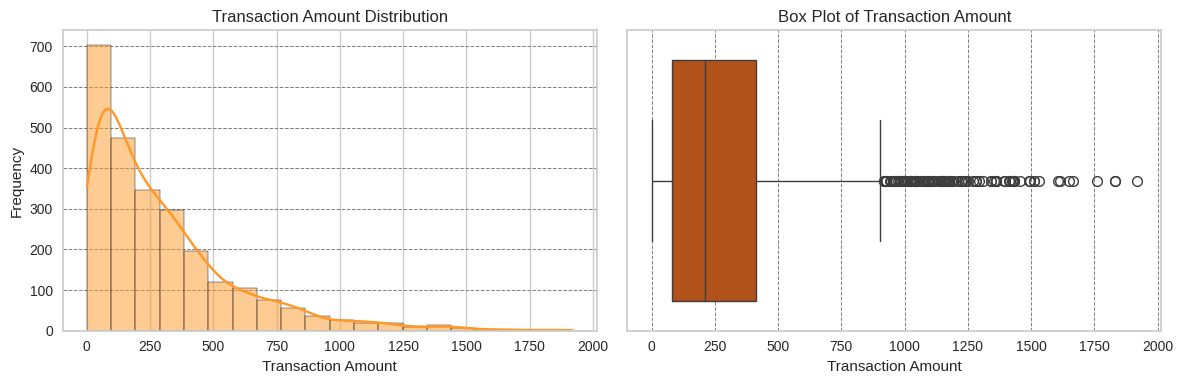


Summary Statistics for Transaction Amount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


In [1040]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionAmount'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')
axes[0].set_xlabel('Transaction Amount')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionAmount'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Amount')
axes[1].set_xlabel('Transaction Amount')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Amount:\n', df['TransactionAmount'].describe())

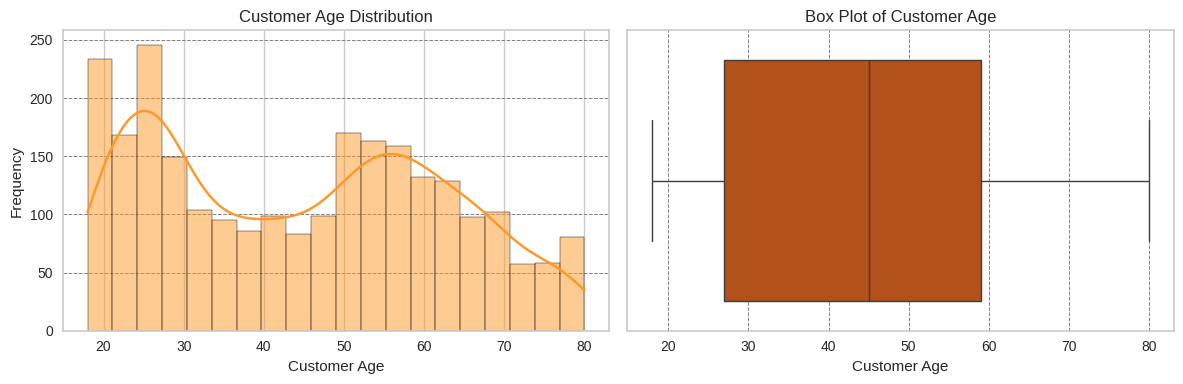


Summary Statistics for Customer Age:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


In [1041]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CustomerAge'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Customer Age Distribution')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['CustomerAge'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Customer Age:\n', df['CustomerAge'].describe())

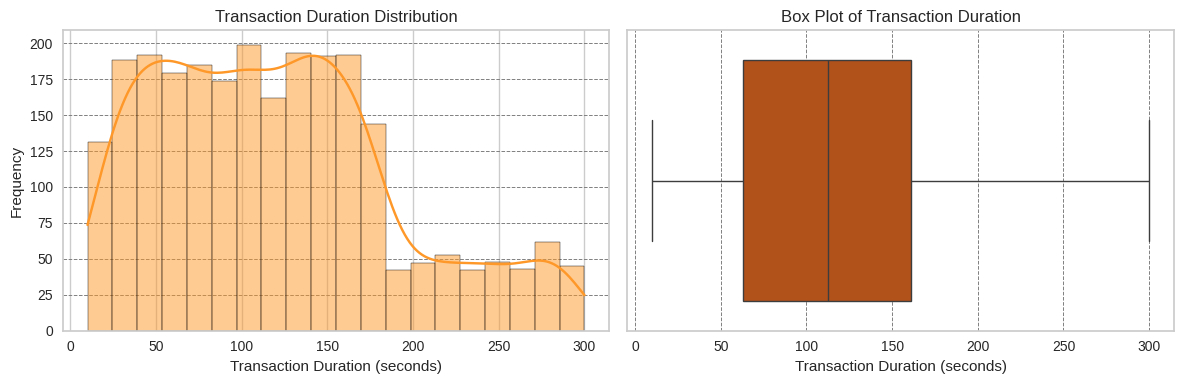


Summary Statistics for Transaction Duration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


In [1042]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionDuration'], bins=20, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Transaction Duration Distribution')
axes[0].set_xlabel('Transaction Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionDuration'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Duration')
axes[1].set_xlabel('Transaction Duration (seconds)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Transaction Duration:\n', df['TransactionDuration'].describe())

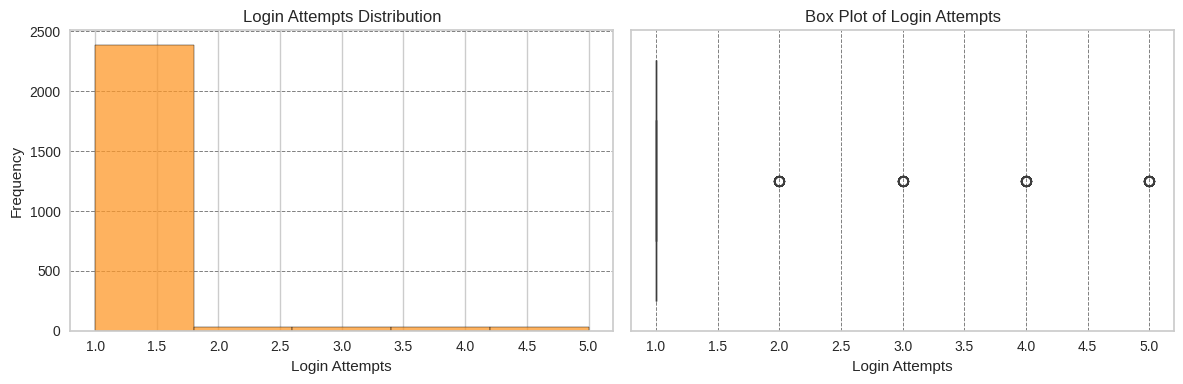


Summary Statistics for Login Attempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


In [1043]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['LoginAttempts'], bins=5, kde=False, color=custom_palette[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Login Attempts Distribution')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['LoginAttempts'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Login Attempts')
axes[1].set_xlabel('Login Attempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Login Attempts:\n', df['LoginAttempts'].describe())

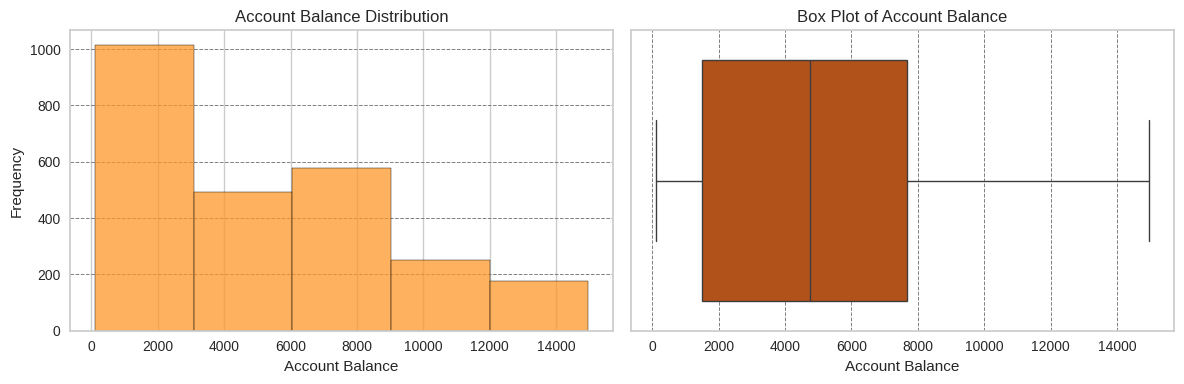


Summary Statistics for Account Balance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [1044]:
custom_palette = sns.color_palette("YlOrBr", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['AccountBalance'], bins=5, kde=False, color=custom_palette[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Account Balance Distribution')
axes[0].set_xlabel('Account Balance')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['AccountBalance'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Account Balance')
axes[1].set_xlabel('Account Balance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Account Balance:\n', df['AccountBalance'].describe())

<ipython-input-1045-d9905d33350a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


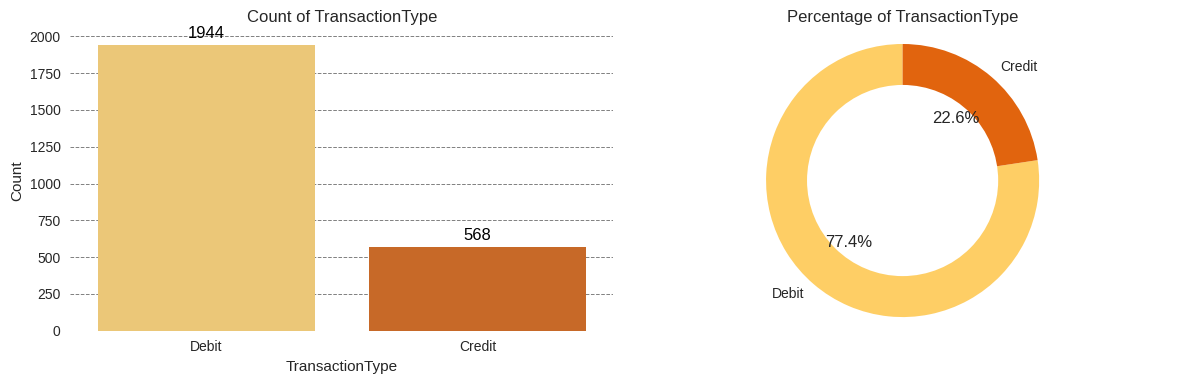

In [1045]:
def plot_categorical_distribution(df, feature, palette="YlOrBr"):
    num_categories = len(df[feature].unique())

    custom_palette = sns.color_palette(palette, num_categories)

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)

    axes[0].set_title(f'Count of {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Count')

    for p in axes[0].patches:
        axes[0].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='baseline',
                         color='black', fontsize=12,
                         xytext=(0, 5),
                         textcoords='offset points')

    axes[0].set_axisbelow(True)
    axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)

    # Pie Chart
    feature_counts = df[feature].value_counts()
    wedges, texts, autotexts = axes[1].pie(
        feature_counts,
        labels=feature_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=custom_palette
    )

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)
    axes[1].set_title(f'Percentage of {feature}')
    axes[1].axis('equal')
    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df, 'TransactionType')

<ipython-input-1045-d9905d33350a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


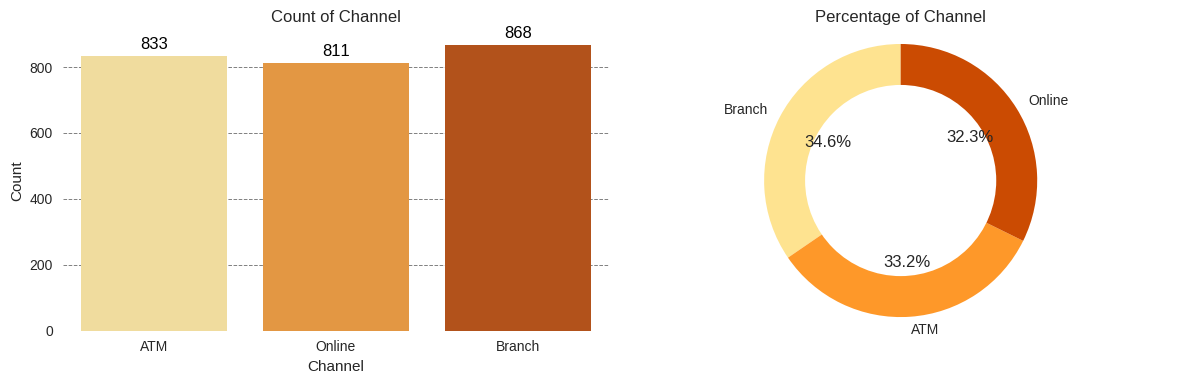

In [1046]:
plot_categorical_distribution(df, 'Channel')

<ipython-input-1045-d9905d33350a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, ax=axes[0], palette=custom_palette)


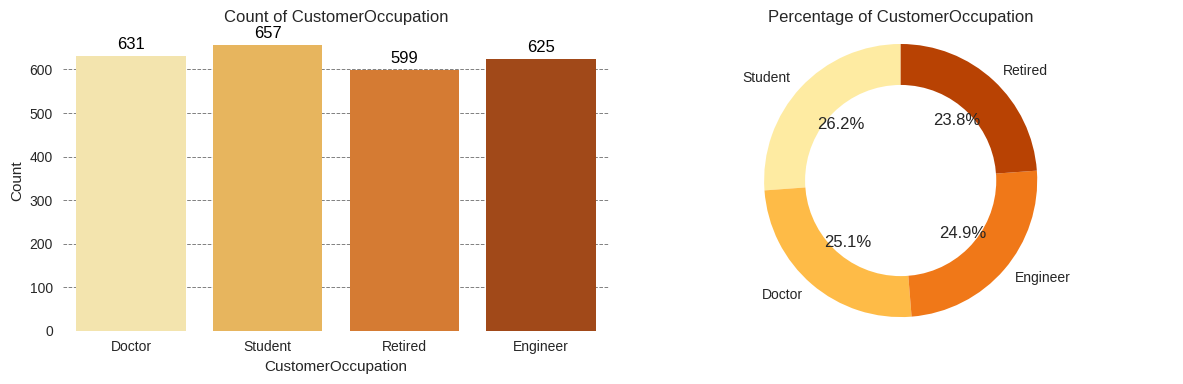

In [1047]:
plot_categorical_distribution(df, 'CustomerOccupation')

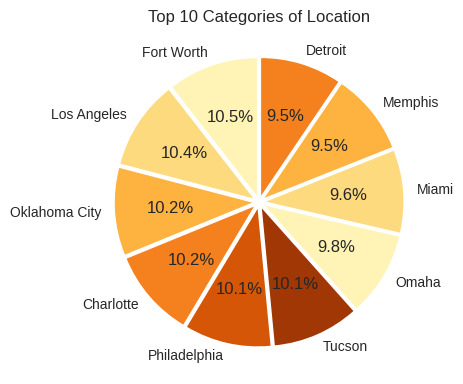

In [1048]:
def plot_top_categories_pie_chart(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(8, 4))

    top_categories = data[column_name].value_counts().nlargest(10)

    top_categories.plot.pie(autopct='%1.1f%%', colors=sns.color_palette(palette),
                             startangle=90, explode=[0.05] * len(top_categories))

    plt.title(f'Top 10 Categories of {column_name}')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()

plot_top_categories_pie_chart('Location')

In [1049]:
location_stats = df.groupby('Location')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(location_stats.nlargest(10, 'count')) # Top 10 locations by transaction count

               count        mean  median
Location                                
Fort Worth        70  296.810571  240.41
Los Angeles       69  285.155797  170.19
Charlotte         68  260.039118  185.15
Oklahoma City     68  319.353529  226.50
Philadelphia      67  290.586866  177.05
Tucson            67  305.369552  214.83
Omaha             65  283.143846  178.91
Miami             64  265.144219  168.07
Detroit           63  327.139048  235.40
Houston           63  308.200794  224.19


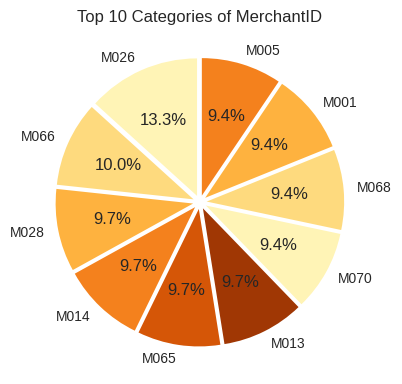

In [1050]:
plot_top_categories_pie_chart('MerchantID')

In [1051]:
merchant_stats = df.groupby('MerchantID')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(merchant_stats.nlargest(10, 'count')) # Top 10 merchants by transaction count, with amount stats

            count        mean   median
MerchantID                            
M026           45  308.114444  185.990
M066           34  351.433824  244.210
M013           33  315.646970  236.810
M014           33  286.909091  256.800
M028           33  312.615758  180.940
M065           33  240.501818  166.550
M001           32  260.002500  145.850
M005           32  346.872813  275.325
M015           32  298.023438  171.250
M068           32  302.502187  269.905


## **4.3. Bivariate Analysis**

<ipython-input-1052-daa07956bf01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-1052-daa07956bf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
<ipython-input-1052-daa07956bf01>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)


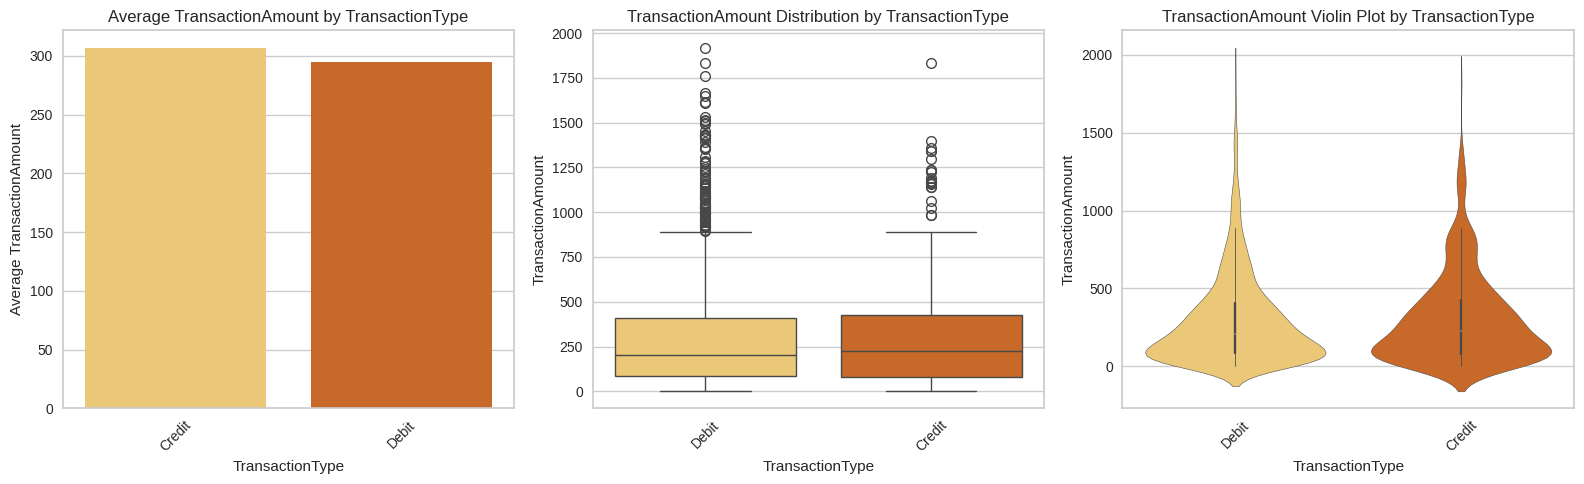

In [1052]:
def plot_categorical_relationships(column_name, data=df, palette='YlOrBr'):
    plt.figure(figsize=(16, 5))

    # Bar Plot
    plt.subplot(1, 3, 1)
    avg_transaction = data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45)

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_categorical_relationships('TransactionType')

<ipython-input-1052-daa07956bf01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-1052-daa07956bf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
<ipython-input-1052-daa07956bf01>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)


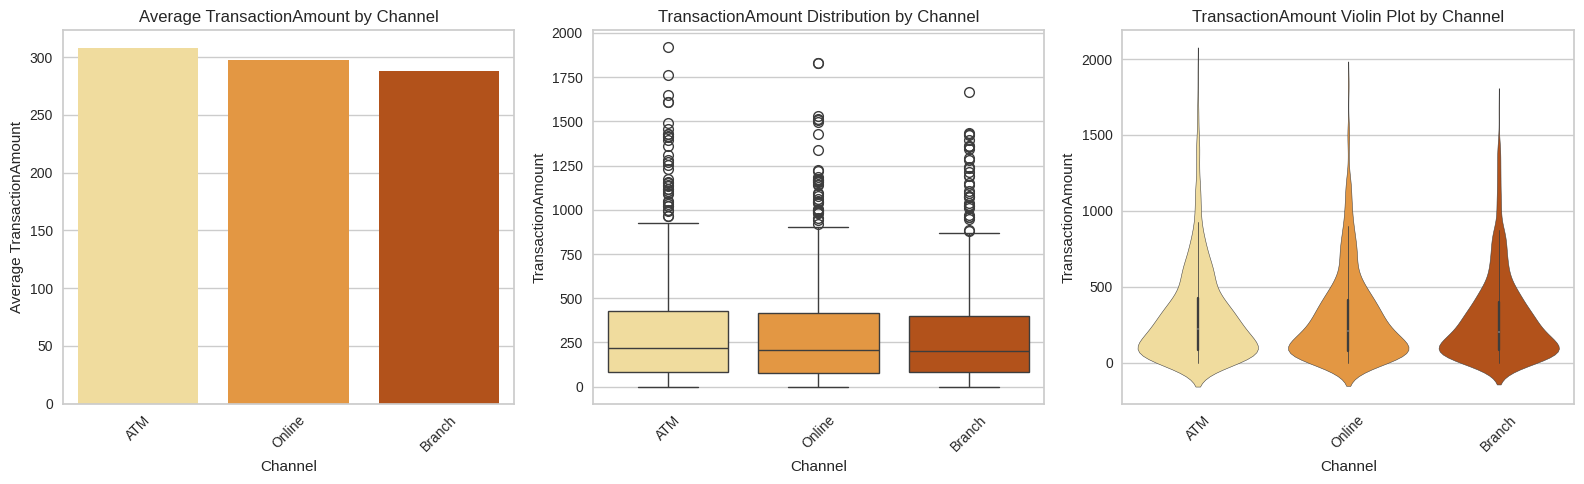

In [1053]:
plot_categorical_relationships('Channel')

<ipython-input-1052-daa07956bf01>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-1052-daa07956bf01>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=data, palette=palette)
<ipython-input-1052-daa07956bf01>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=data, palette=palette)


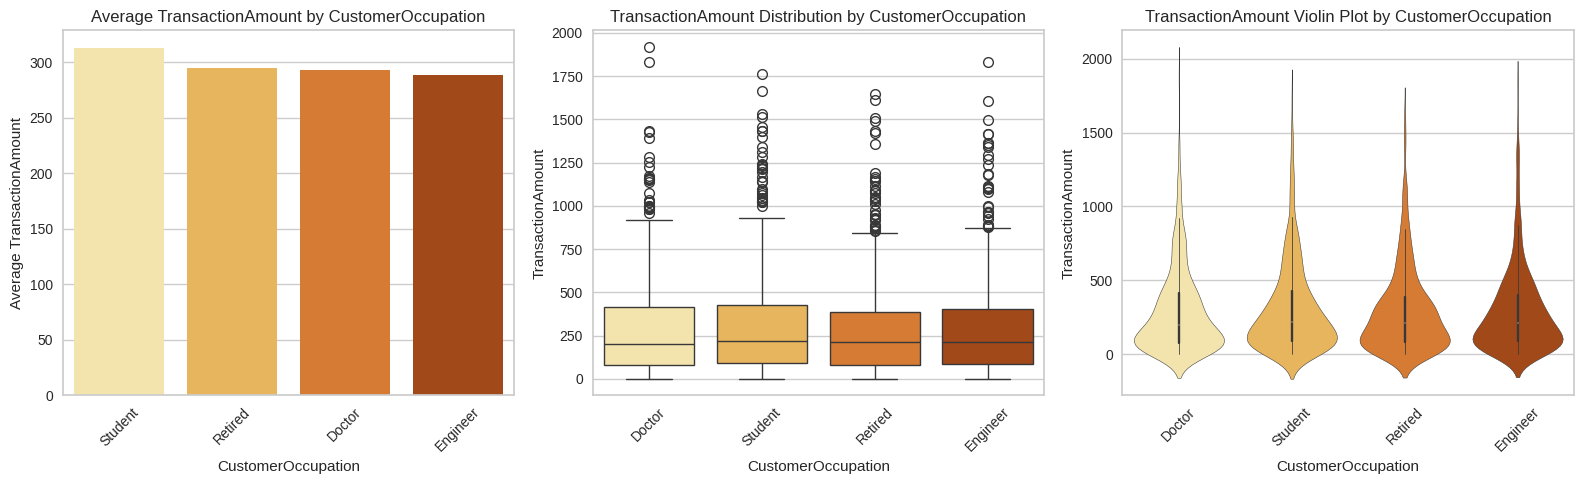

In [1054]:
plot_categorical_relationships('CustomerOccupation')

<ipython-input-1055-915a8e7ac702>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-1055-915a8e7ac702>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
<ipython-input-1055-915a8e7ac702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)


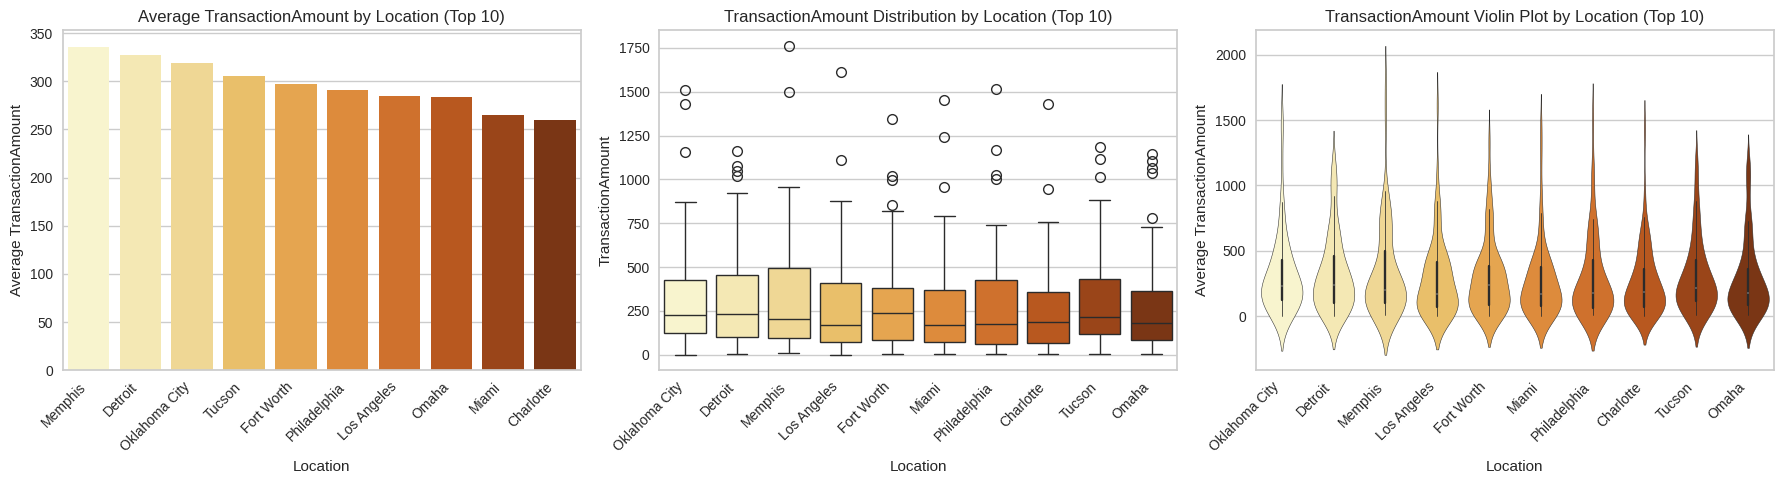

In [1055]:
def plot_categorical_relationships_improved(column_name, data=df, top_n=15, palette='YlOrBr'):
    top_categories = data[column_name].value_counts().index[:top_n]
    filtered_data = data[data[column_name].isin(top_categories)]

    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    avg_transaction = filtered_data.groupby(column_name)['TransactionAmount'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
    plt.title(f'Average TransactionAmount by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.subplot(1, 3, 2)
    sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Distribution by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    # Violin Plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
    plt.title(f'TransactionAmount Violin Plot by {column_name} (Top {top_n})')
    plt.xlabel(column_name)
    plt.ylabel('Average TransactionAmount')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

plot_categorical_relationships_improved('Location', top_n=10)

<ipython-input-1055-915a8e7ac702>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction.index, y=avg_transaction.values, palette=palette)
<ipython-input-1055-915a8e7ac702>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)
<ipython-input-1055-915a8e7ac702>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=column_name, y='TransactionAmount', data=filtered_data, palette=palette)


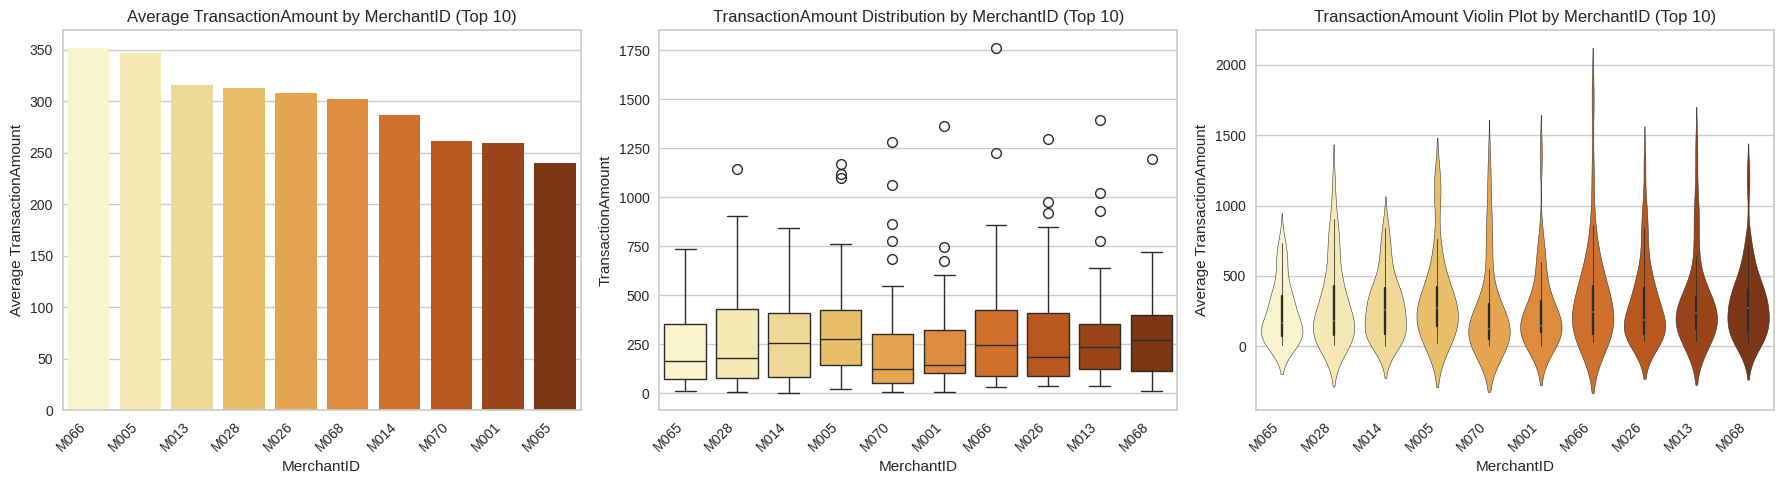

In [1056]:
plot_categorical_relationships_improved('MerchantID', top_n=10)

Number of high-value transactions (top 5%): 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51
82,TX000083,AC00236,922.55,2023-01-23 16:32:48,Debit,Detroit,D000206,21.97.154.92,M004,ATM,63,Retired,87,1,4715.84,2024-11-04 08:11:07
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53
110,TX000111,AC00068,1045.22,2023-11-22 16:13:39,Debit,Columbus,D000400,77.7.223.184,M077,ATM,53,Retired,73,1,1829.90,2024-11-04 08:07:35
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24


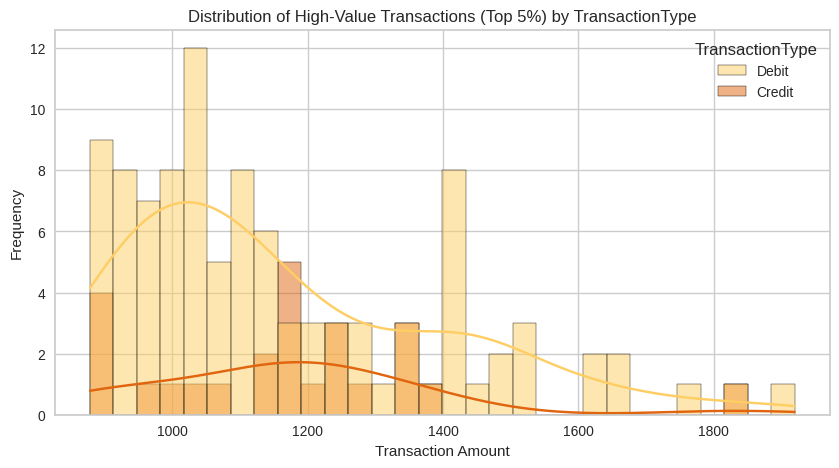

In [1057]:
high_value_threshold = df['TransactionAmount'].quantile(0.95)
high_value_transactions = df[df['TransactionAmount'] > high_value_threshold]
print(f"Number of high-value transactions (top 5%): {len(high_value_transactions)}")
display(high_value_transactions.head())

# Plot high-value transactions
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='TransactionType', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by TransactionType')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

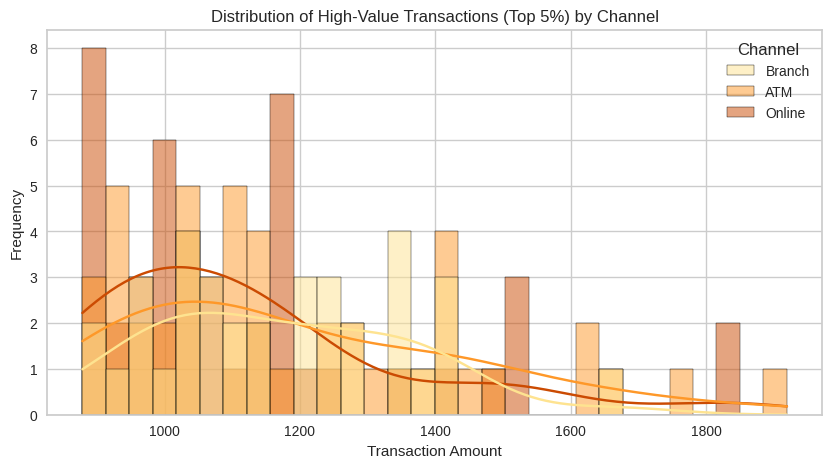

In [1058]:
# Plotting high-value transactions with 'Channel' as hue
plt.figure(figsize=(10, 5))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='Channel', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

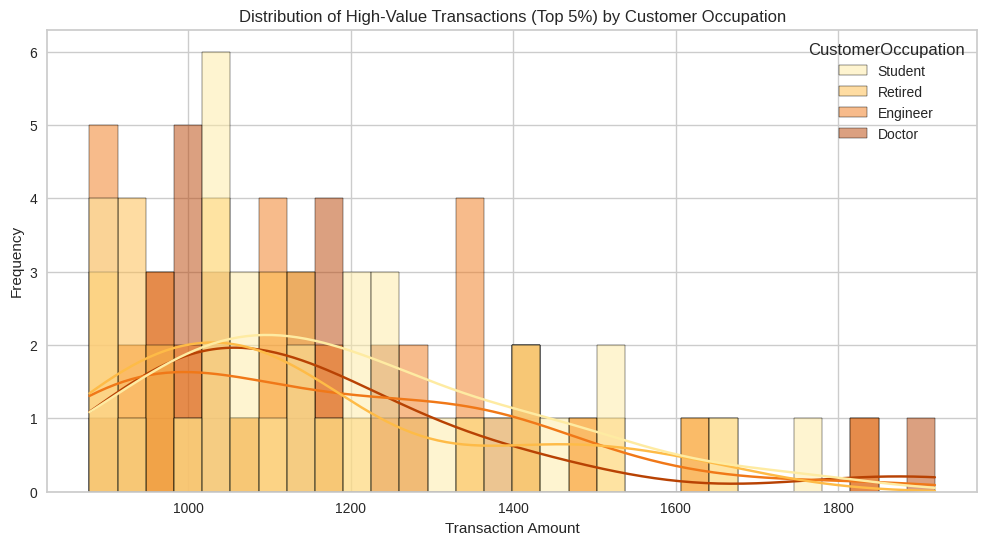

In [1059]:
# Plotting high-value transactions with 'CustomerOccupation' as hue
plt.figure(figsize=(12, 6))
sns.histplot(data=high_value_transactions, x='TransactionAmount', bins=30, kde=True, hue='CustomerOccupation', palette='YlOrBr')
plt.title('Distribution of High-Value Transactions (Top 5%) by Customer Occupation')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

## **4.4. Multivariate Analysis**

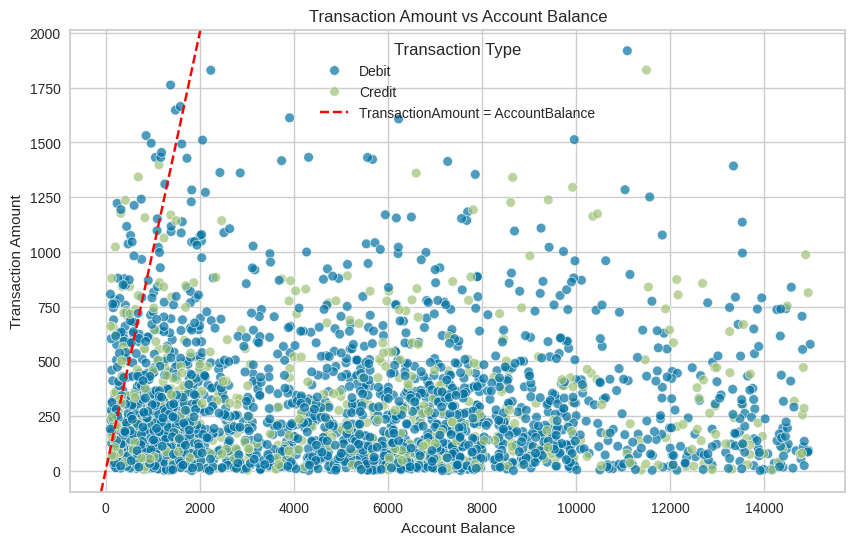

In [1060]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountBalance', y='TransactionAmount', hue='TransactionType', alpha=0.7)

# Menambahkan garis referensi untuk batas saldo
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='TransactionAmount = AccountBalance')

# Menambahkan label dan judul
plt.title('Transaction Amount vs Account Balance')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.legend(title='Transaction Type')
plt.grid(True)

# Menampilkan plot
plt.show()


Terlihat pada scatter plot di atas bagian garis merah ke kiri, terdapat beberapa transaksi dengan tipe Debit yang mencurigakan karena TransactionAmount > AccountBalance. Mari kita telusuri seberapa banyak data anomali.  

In [1061]:
# Menandai transaksi debit yang melebihi saldo
anomalies = df[(df['TransactionType'] == 'Debit') & (df['TransactionAmount'] > df['AccountBalance'])]
print('Banyaknya anomali:', len(anomalies), 'data')

Banyaknya anomali: 89 data


<ipython-input-1062-2bb01e77206c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=anomalies, palette='Blues')


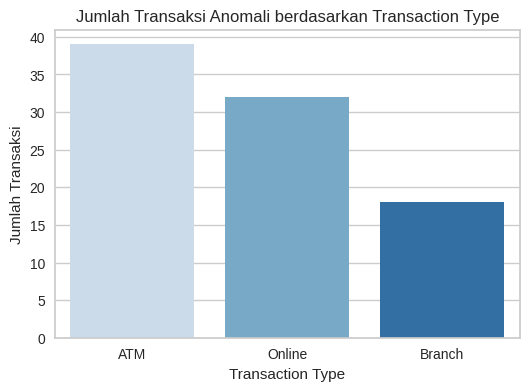

In [1062]:
# Mengatur ukuran plot
plt.figure(figsize=(6, 4))

# Bar plot untuk TransactionType
sns.countplot(x='Channel', data=anomalies, palette='Blues')

# Menambahkan judul
plt.title('Jumlah Transaksi Anomali berdasarkan Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Jumlah Transaksi')

# Menampilkan plot
plt.show()

In [1063]:
# Show the top 5 accounts involved in anomalous data.
anomalies.value_counts('AccountID', ascending=False).head(5)

,count
AccountID,
AC00014,2
AC00040,2
AC00398,2
AC00407,2
AC00284,2


In [1064]:
# Show the top 5 accounts involved in anomalous data.
anomalies.value_counts('Location', ascending=False).head(5)

,count
Location,
El Paso,5
Kansas City,5
Memphis,5
Denver,4
Boston,4


## **4.4. Corelation Analysis**

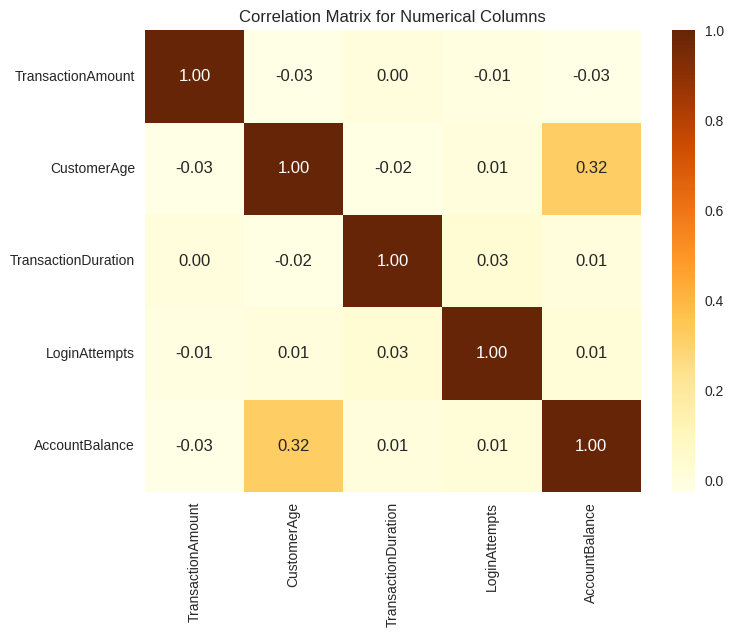

In [1065]:
# Define the YlOrBr colormap
cmap = "YlOrBr"

numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Display correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

**Insight**:
Catatan preprocessing:
- Tidak ada missing value maupun data duplikat
- Terdapat kesalahan tipe data pada TransactionDate dan PreviousTransactionDate -> ubah menjadi datetime
- Fitur potensial baru transaction gap date untuk mengetahui berapa lama selisih waktu antara dua transaksi berturut-turut, ip usage untuk berapa banyak IP yang digunakan, device usage untuk berapa banyak device yang digunakan, balance change ratio untuk mengetahui rasio perubahan saldo akun, merchan preference untuk preferensi merchan.
- Drop atribut yang tidak perlu: TransactionID, AccountID, TransactionDate, PreviousTransactionDate, DeviceID, MerchantID. IP Address
- Label encoding untuk tipe data kategori
- Menghapus data dengan kesalahan nilai dengan ciri Transaction Amount melebihi Account Balance untuk tipe transaksi debit.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

## **5.1. Menangani Kesalahan Tipe Data**

In [1066]:
date_columns = ['TransactionDate', 'PreviousTransactionDate']
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

## **5.2. Feature Engineering**

In [1067]:
# Feature Engineering
df['TransactionGapDate'] = (df['PreviousTransactionDate'] - df['TransactionDate'] ).dt.days

# Device and IP Usage
df['DeviceUsage'] = df.groupby('DeviceID')['TransactionID'].transform('count')
df['IPUsage'] = df.groupby('IP Address')['TransactionID'].transform('count')

# Amount Ratio
df['AmountRatio'] = df['TransactionAmount'] / df['AccountBalance']
df['TotalSaldo'] = df.apply(
    lambda row: row['AccountBalance'] + row['TransactionAmount'] if row['TransactionType'] == 'Credit' else row['AccountBalance'] - row['TransactionAmount'],
    axis=1
)

# Merchant Preferences
df['MerchantPreference'] = df.groupby(['AccountID', 'MerchantID'])['TransactionID'].transform('count')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,...,81,1,5112.21,2024-11-04 08:08:08,572,6,3,0.002756,5098.12,1
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,...,141,1,13758.91,2024-11-04 08:09:35,495,5,4,0.027345,13382.67,1
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,...,56,1,1122.35,2024-11-04 08:07:04,482,5,7,0.112523,996.06,1
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,...,25,1,8569.06,2024-11-04 08:09:06,548,6,8,0.021531,8384.56,1
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,...,198,1,7429.40,2024-11-04 08:06:39,384,3,4,0.001810,7442.85,1


In [1068]:
df[df['AccountBalance'] < df['TransactionAmount']]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference
13,TX000014,AC00264,781.76,2023-11-20 16:39:15,Debit,Memphis,D000054,193.83.0.183,M025,ATM,...,123,1,189.69,2024-11-04 08:07:06,349,4,5,4.121250,-592.07,1
33,TX000034,AC00359,877.81,2023-03-13 17:23:24,Debit,Los Angeles,D000111,134.140.85.231,M094,Online,...,150,1,399.00,2024-11-04 08:07:50,601,3,6,2.200025,-478.81,1
48,TX000049,AC00296,626.90,2023-11-27 16:45:57,Debit,Denver,D000284,93.146.251.20,M023,Online,...,138,1,265.51,2024-11-04 08:07:24,342,4,5,2.361116,-361.39,1
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,...,24,1,605.95,2024-11-04 08:06:51,396,3,5,2.001007,-606.56,2
107,TX000108,AC00397,756.59,2023-03-06 16:47:02,Debit,Sacramento,D000028,174.61.77.54,M012,Branch,...,17,1,420.65,2024-11-04 08:11:40,608,4,6,1.798621,-335.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,TX002415,AC00028,1664.33,2023-09-25 17:11:19,Debit,San Antonio,D000072,116.106.207.139,M064,Branch,...,65,1,1588.31,2024-11-04 08:07:07,405,6,5,1.047862,-76.02,1
2446,TX002447,AC00014,719.76,2023-03-30 17:50:23,Debit,San Francisco,D000548,161.25.82.11,M038,Branch,...,190,1,690.52,2024-11-04 08:11:25,584,9,5,1.042345,-29.24,1
2453,TX002454,AC00222,190.90,2023-10-09 16:17:07,Debit,Jacksonville,D000390,42.61.10.112,M002,Online,...,40,1,101.25,2024-11-04 08:10:27,391,3,5,1.885432,-89.65,1
2470,TX002471,AC00128,425.91,2023-03-24 16:34:27,Debit,Jacksonville,D000412,177.116.108.246,M038,ATM,...,47,1,383.58,2024-11-04 08:07:14,590,3,6,1.110355,-42.33,1


## **5.3. Menghapus Atribut Yang Tidak Perlu**

In [1069]:
# drop unnecessary attributes
df.drop(['TransactionID', 'AccountID', 'TransactionDate', 'PreviousTransactionDate', 'DeviceID', 'MerchantID', 'IP Address'], axis=1, inplace=True)
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,572,6,3,0.002756,5098.12,1
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,495,5,4,0.027345,13382.67,1
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,482,5,7,0.112523,996.06,1
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,548,6,8,0.021531,8384.56,1
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,384,3,4,0.001810,7442.85,1


## **5.4. Binning Data**

In [1070]:
# Menentukan jumlah bin (misalnya, 4 bin dengan jumlah data yang sama)
num_bins = 4
labels = ['Low', 'Medium', 'High', 'Very High']

# Melakukan binning dengan distribusi yang sama
df['Binned_Amount'] = pd.qcut(df['TransactionAmount'], q=num_bins, labels=labels)

# Cek hasil
df[['TransactionAmount', 'Binned_Amount']].head()

,TransactionAmount,Binned_Amount
0,14.09,Low
1,376.24,High
2,126.29,Medium
3,184.50,Medium
4,13.45,Low


## **5.5. Encoding Data Kategorikal**

In [1071]:
# Select features for clustering
X = df.copy()
X

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,572,6,3,0.002756,5098.12,1,Low
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,495,5,4,0.027345,13382.67,1,High
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,482,5,7,0.112523,996.06,1,Medium
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,548,6,8,0.021531,8384.56,1,Medium
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,384,3,4,0.001810,7442.85,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,856.21,Credit,Colorado Springs,Branch,33,Doctor,109,1,12690.79,557,3,1,0.067467,13547.00,1,Very High
2508,251.54,Debit,Tucson,Branch,48,Doctor,177,1,254.75,592,5,5,0.987399,3.21,1,High
2509,28.63,Debit,San Diego,Branch,56,Retired,146,1,3382.91,440,5,4,0.008463,3354.28,1,Low
2510,185.97,Debit,Denver,Online,23,Student,19,1,1776.91,618,2,6,0.104659,1590.94,1,Medium


In [1072]:
# encoding categorical data
cat_col = df.select_dtypes(include=['object', 'category']).columns
label_encoder = LabelEncoder()

for col in cat_col:
    X[col] = label_encoder.fit_transform(X[col])
X.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount
0,14.09,1,36,0,70,0,81,1,5112.21,572,6,3,0.002756,5098.12,1,1
1,376.24,1,15,0,68,0,141,1,13758.91,495,5,4,0.027345,13382.67,1,0
2,126.29,1,23,2,19,3,56,1,1122.35,482,5,7,0.112523,996.06,1,2
3,184.50,1,33,2,26,3,25,1,8569.06,548,6,8,0.021531,8384.56,1,2
4,13.45,0,1,2,26,3,198,1,7429.40,384,3,4,0.001810,7442.85,1,1


## **5.6. Feature Scaling**

In [1073]:
# Standardize the data numerical

scaler = RobustScaler() # scaler yang mengatasi outlier
num_col = X.select_dtypes(include=['int64', 'float64']).columns

for col in num_col:
    X[col] = scaler.fit_transform(X[[col]])

In [1074]:
X_scaled = X.copy()
X_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount
0,-0.592378,0.0,0.75,-0.5,0.78125,-0.5,-0.321429,0.0,0.061009,0.467742,0.666667,-1.0,-0.368297,0.083071,0.0,-0.333333
1,0.496329,0.0,-0.30,-0.5,0.71875,-0.5,0.290816,0.0,1.461410,0.053763,0.333333,-0.5,-0.184103,1.417042,0.0,-1.000000
2,-0.255079,0.0,0.10,0.5,-0.81250,0.5,-0.576531,0.0,-0.585179,-0.016129,0.333333,1.0,0.453954,-0.577439,0.0,0.333333
3,-0.080086,0.0,0.60,0.5,-0.59375,0.5,-0.892857,0.0,0.620873,0.338710,0.666667,1.5,-0.227657,0.612251,0.0,0.333333
4,-0.594302,-1.0,-1.00,0.5,-0.59375,0.5,0.872449,0.0,0.436296,-0.543011,-0.333333,-0.5,-0.375382,0.460618,0.0,-0.333333


## **5.7. Matriks Korelasi**

In [1075]:
# correlation matrix
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
correlation_matrix

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount
TransactionAmount,1.000000,-0.016495,0.011179,-0.014741,-0.025616,0.026313,0.004359,-0.008445,-0.025165,-0.024216,-0.030075,0.005683,0.389860,-0.065083,-0.024911,0.503994
TransactionType,-0.016495,1.000000,-0.021786,-0.207020,-0.044948,0.001583,0.001924,-0.017730,-0.018714,0.033485,-0.013779,-0.017279,-0.023392,-0.082616,0.029203,0.014470
Location,0.011179,-0.021786,1.000000,0.002359,-0.030460,-0.006527,-0.016872,-0.011013,-0.006824,-0.005641,0.007218,0.008259,-0.004968,-0.007602,0.017431,0.028105
Channel,-0.014741,-0.207020,0.002359,1.000000,-0.012149,-0.002951,-0.010566,0.003056,0.007980,-0.023006,0.000936,0.008568,0.002507,0.021559,0.011372,0.002201
CustomerAge,-0.025616,-0.044948,-0.030460,-0.012149,1.000000,-0.378925,-0.017936,0.007653,0.319942,-0.023287,-0.010603,-0.009369,-0.236644,0.322317,-0.001902,-0.044646
CustomerOccupation,0.026313,0.001583,-0.006527,-0.002951,-0.378925,1.000000,-0.003536,-0.019739,-0.672282,-0.004265,0.010423,0.013989,0.260460,-0.668492,-0.024276,0.005675
TransactionDuration,0.004359,0.001924,-0.016872,-0.010566,-0.017936,-0.003536,1.000000,0.032639,0.005577,-0.019698,0.011003,-0.005643,0.009074,0.004354,-0.017903,0.009514
LoginAttempts,-0.008445,-0.017730,-0.011013,0.003056,0.007653,-0.019739,0.032639,1.000000,0.014999,0.020757,-0.004568,-0.025476,-0.004339,0.017009,-0.030935,-0.002068
AccountBalance,-0.025165,-0.018714,-0.006824,0.007980,0.319942,-0.672282,0.005577,0.014999,1.000000,-0.019378,-0.014857,-0.012309,-0.363401,0.995182,0.006129,0.010848
TransactionGapDate,-0.024216,0.033485,-0.005641,-0.023006,-0.023287,-0.004265,-0.019698,0.020757,-0.019378,1.000000,-0.002580,-0.014777,0.012939,-0.020153,0.002311,-0.018368


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1076]:
kmeans = KMeans(init='k-means++', max_iter=300, n_init=20)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

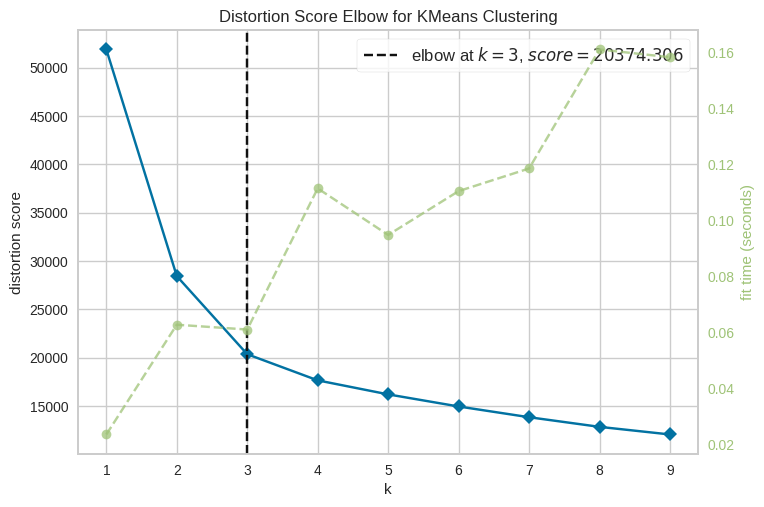

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1077]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_scaled)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [1078]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20)
kmeans.fit(X_scaled)

# Assign clusters and calculate distance to cluster centroid
df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 126


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount,Cluster,DistanceToCentroid
9,815.96,Debit,Nashville,ATM,55,Doctor,120,1,1021.88,583,4,6,0.798489,205.92,1,Very High,2,4.619180
13,781.76,Debit,Memphis,ATM,26,Student,123,1,189.69,349,4,5,4.121250,-592.07,1,Very High,1,4.721489
26,246.93,Debit,Miami,ATM,23,Student,158,5,673.35,566,8,5,0.366719,426.42,1,High,0,4.890886
33,877.81,Debit,Los Angeles,Online,22,Student,150,1,399.00,601,3,6,2.200025,-478.81,1,Very High,2,6.302262
47,510.24,Debit,Oklahoma City,Online,19,Student,105,1,781.70,391,3,7,0.652731,271.46,2,Very High,0,4.875531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292,1030.85,Debit,San Diego,ATM,25,Student,39,1,1941.80,426,6,8,0.530873,910.95,1,Very High,0,4.711460
2304,1142.76,Credit,Houston,Online,25,Student,71,1,1498.93,599,3,6,0.762384,2641.69,2,Very High,2,5.133410
2317,535.40,Debit,San Diego,Branch,23,Student,110,1,651.84,541,7,9,0.821367,116.44,1,Very High,2,4.855823
2348,432.18,Debit,Las Vegas,Branch,18,Student,162,1,678.83,534,3,5,0.636654,246.65,1,Very High,0,4.524432


In [1079]:
# prompt: evaluate kmeans cluster with silhouette score

silhouette_avg1 = silhouette_score(X_scaled, df['Cluster'])
print(f"For n_clusters = 3, the average silhouette_score is : {silhouette_avg1}")


For n_clusters = 3, the average silhouette_score is : 0.6385814312133715


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [1080]:
# select 5 best features

selector = VarianceThreshold(threshold=0.5) # Robust Scaler witout Binning
df_num_sel = selector.fit_transform(X_scaled)
X_new = pd.DataFrame(df_num_sel)
X_new.head()

,0,1,2,3,4
0,-0.592378,-0.321429,-1.0,-0.368297,-0.333333
1,0.496329,0.290816,-0.5,-0.184103,-1.000000
2,-0.255079,-0.576531,1.0,0.453954,0.333333
3,-0.080086,-0.892857,1.5,-0.227657,0.333333
4,-0.594302,0.872449,-0.5,-0.375382,-0.333333


In [1081]:
selected_columns = X_scaled.columns[selector.get_support()]
print("Kolom yang terpilih:", selected_columns)

Kolom yang terpilih: Index(['TransactionAmount', 'TransactionDuration', 'IPUsage', 'AmountRatio',
       'Binned_Amount'],
      dtype='object')


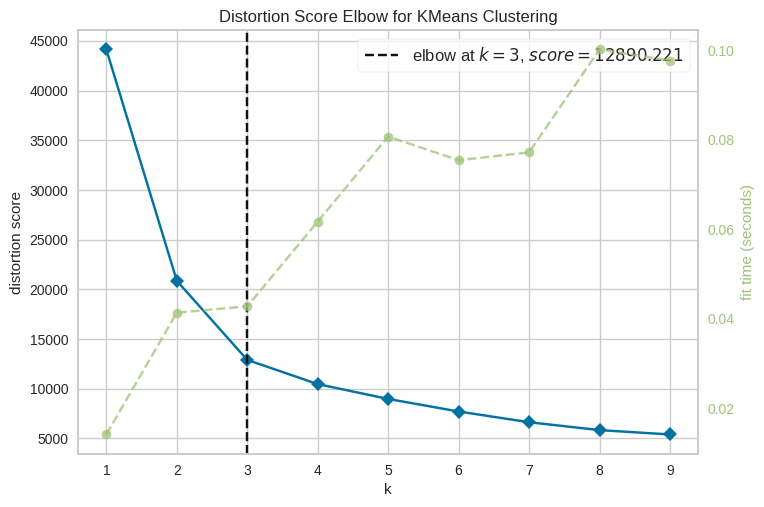

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1082]:
# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_new)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [1083]:
# Fit K-means with the chosen number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20)
kmeans.fit(X_new)

# Assign clusters and calculate distance to cluster centroid
df['NewCluster'] = kmeans.labels_
df['NewDistanceToCentroid'] = np.linalg.norm(X_new - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify potential frauds based on distance threshold
threshold = df['NewDistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['NewDistanceToCentroid'] > threshold]

print(f"Number of potential frauds detected: {len(potential_frauds)}")
display(potential_frauds)

Number of potential frauds detected: 126


,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount,Cluster,DistanceToCentroid,NewCluster,NewDistanceToCentroid
9,815.96,Debit,Nashville,ATM,55,Doctor,120,1,1021.88,583,4,6,0.798489,205.92,1,Very High,2,4.619180,2,4.411013
13,781.76,Debit,Memphis,ATM,26,Student,123,1,189.69,349,4,5,4.121250,-592.07,1,Very High,1,4.721489,1,4.634198
33,877.81,Debit,Los Angeles,Online,22,Student,150,1,399.00,601,3,6,2.200025,-478.81,1,Very High,2,6.302262,2,6.227398
47,510.24,Debit,Oklahoma City,Online,19,Student,105,1,781.70,391,3,7,0.652731,271.46,2,Very High,0,4.875531,0,4.441006
48,626.90,Debit,Denver,Online,26,Student,138,1,265.51,342,4,5,2.361116,-361.39,1,Very High,2,7.479736,2,7.386105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,535.40,Debit,San Diego,Branch,23,Student,110,1,651.84,541,7,9,0.821367,116.44,1,Very High,2,4.855823,2,4.685524
2348,432.18,Debit,Las Vegas,Branch,18,Student,162,1,678.83,534,3,5,0.636654,246.65,1,Very High,0,4.524432,0,4.217390
2403,1493.00,Debit,Colorado Springs,ATM,69,Retired,151,1,1619.16,515,4,4,0.922083,126.16,1,Very High,2,4.485517,2,4.225319
2453,190.90,Debit,Jacksonville,Online,28,Student,40,1,101.25,391,3,5,1.885432,-89.65,1,Medium,2,4.306951,2,4.193582


In [1084]:
# save potential fraud data

# Menambahkan kolom baru 'is_fraud'
df['PotentialFraud'] = np.where(df['NewDistanceToCentroid'] > threshold, 1, 0)

In [1085]:
# prompt: evaluate kmeans cluster with silhouette score

silhouette_avg2 = silhouette_score(X_new, df['NewCluster'])
print(f"For n_clusters = 3, the average silhouette_score is : {silhouette_avg2}") # 0.65

For n_clusters = 3, the average silhouette_score is : 0.724930196748807


In [1086]:
# comparison of silhoutte score before and after feature selection

print(f"Silhouette Score Before Feature Selection: {silhouette_avg1}")
print(f"Silhouette Score After Feature Selection: {silhouette_avg2}")

Silhouette Score Before Feature Selection: 0.6385814312133715
Silhouette Score After Feature Selection: 0.724930196748807


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

<ipython-input-1087-d604803705ad>:21: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(potential_frauds['AmountRatio'], potential_frauds['IPUsage'],


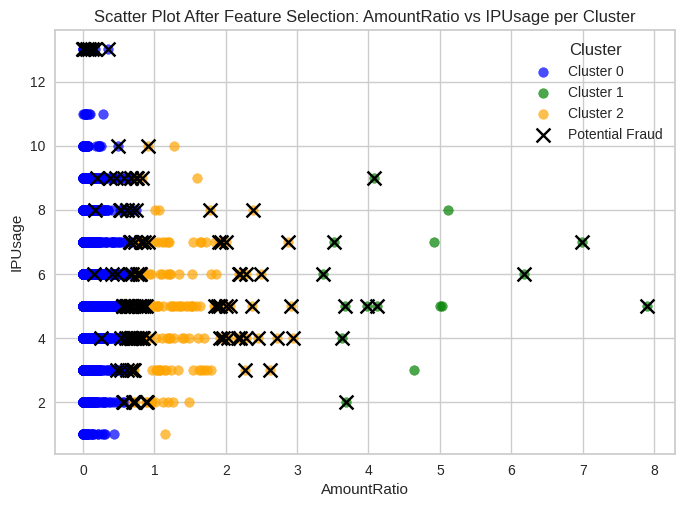

In [1087]:
import matplotlib.pyplot as plt

# Menentukan threshold untuk potential frauds
threshold = df['NewDistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['NewDistanceToCentroid'] > threshold]

# Daftar warna untuk setiap cluster
cluster_colors = {
    0: 'blue',
    1: 'green',
    2: 'orange'
}  # Sesuaikan dengan jumlah cluster

# Membuat scatter plot untuk setiap cluster dengan warna custom
for cluster_id, cluster_data in df.groupby('NewCluster'):
    color = cluster_colors.get(cluster_id, 'gray')  # Jika cluster tidak ada dalam dict, gunakan warna default
    plt.scatter(cluster_data['AmountRatio'], cluster_data['IPUsage'],
                color=color, label=f'Cluster {cluster_id}', alpha=0.7)

# Menambahkan titik-titik potential frauds dengan simbol berbeda
plt.scatter(potential_frauds['AmountRatio'], potential_frauds['IPUsage'],
            color='black', edgecolors='black', marker='x', s=100, label='Potential Fraud')

# Menampilkan plot
plt.title('Scatter Plot After Feature Selection: AmountRatio vs IPUsage per Cluster')
plt.xlabel('AmountRatio')
plt.ylabel('IPUsage')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

In [1088]:
features = X.columns
features

Index(['TransactionAmount', 'TransactionType', 'Location', 'Channel',
       'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'TransactionGapDate', 'DeviceUsage',
       'IPUsage', 'AmountRatio', 'TotalSaldo', 'MerchantPreference',
       'Binned_Amount'],
      dtype='object')

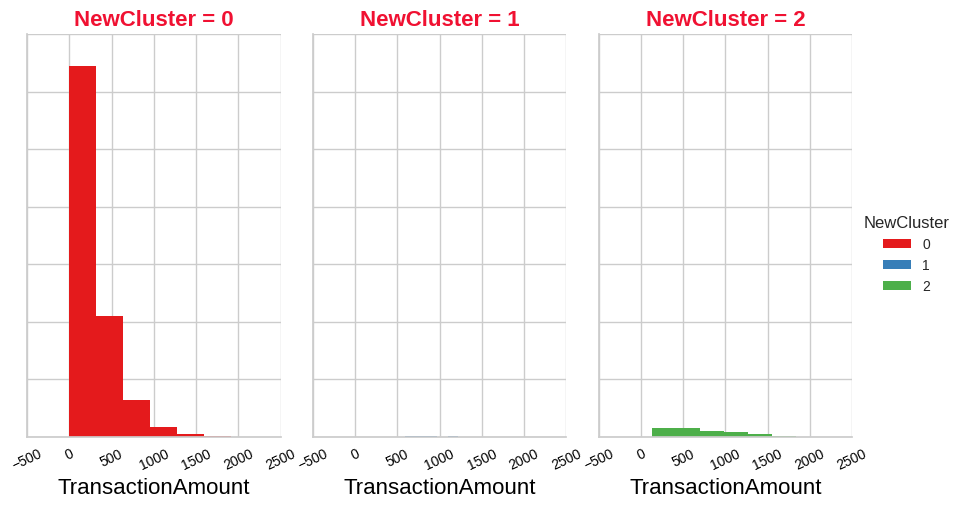

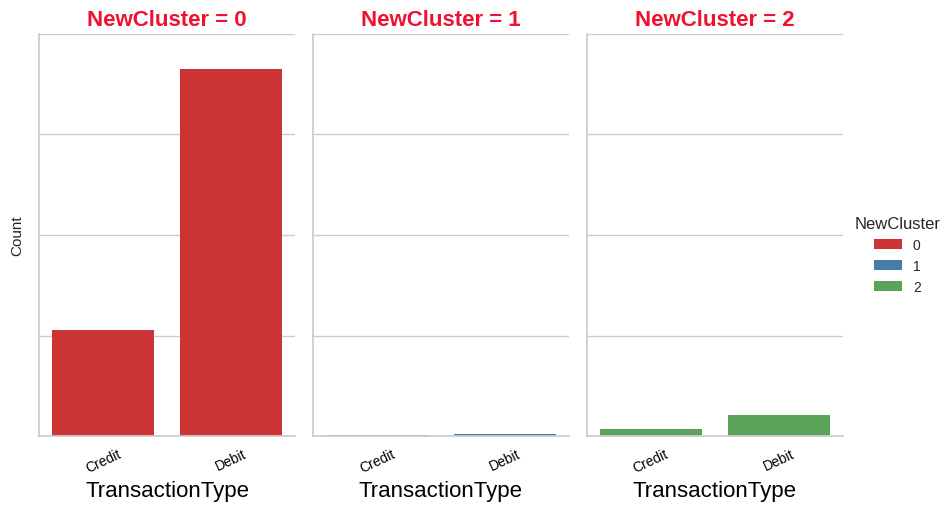

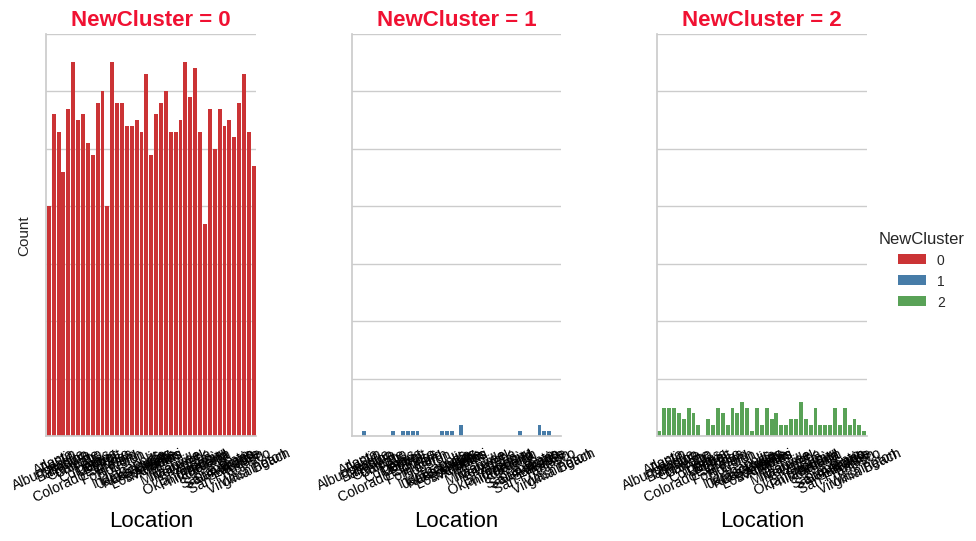

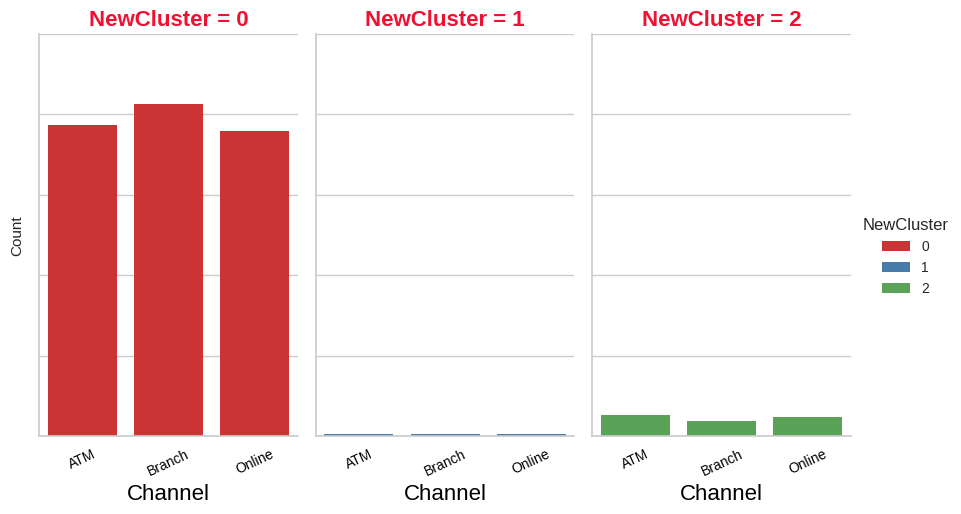

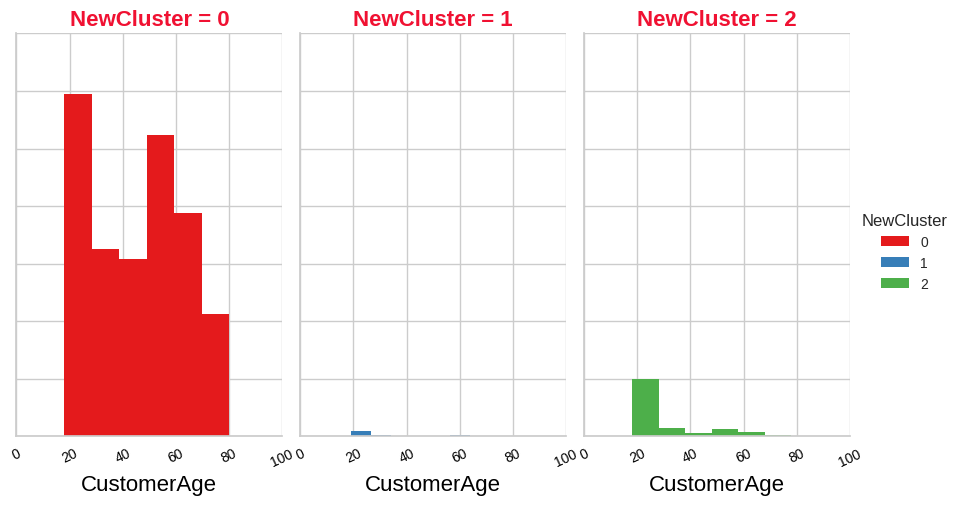

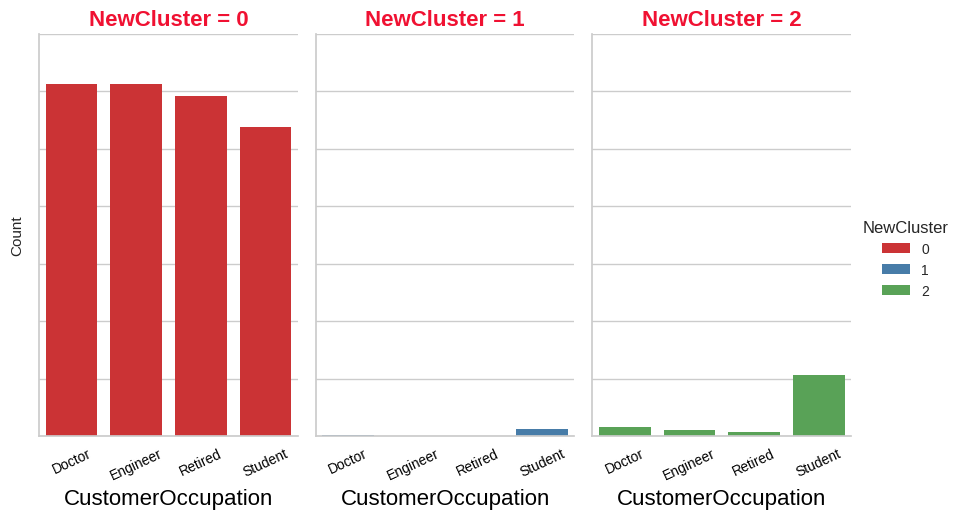

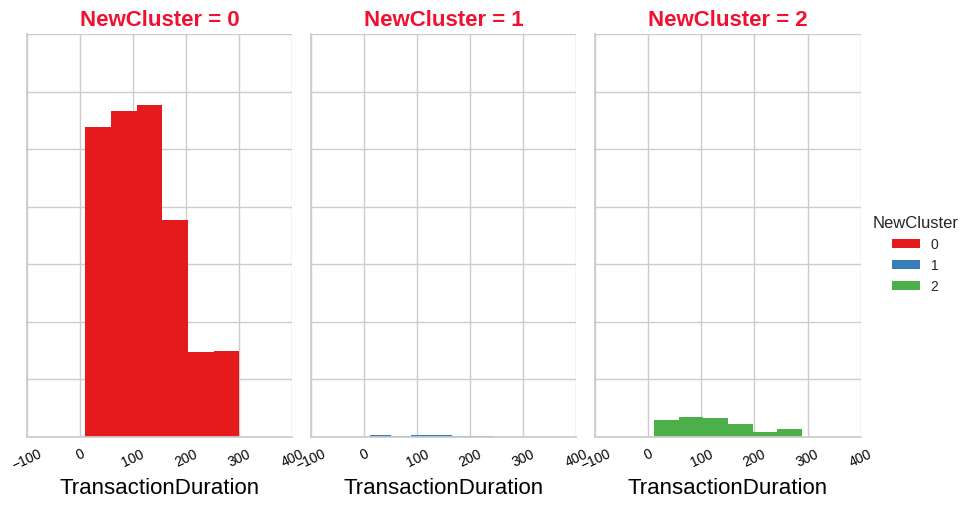

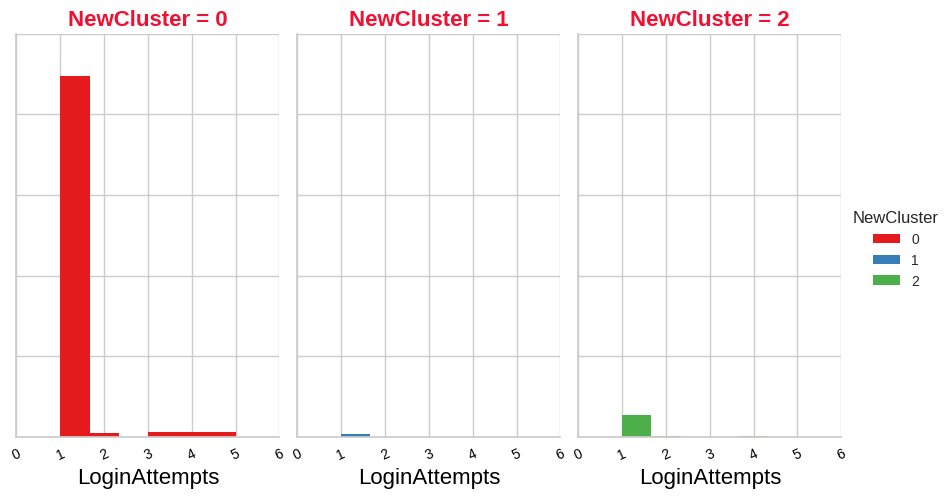

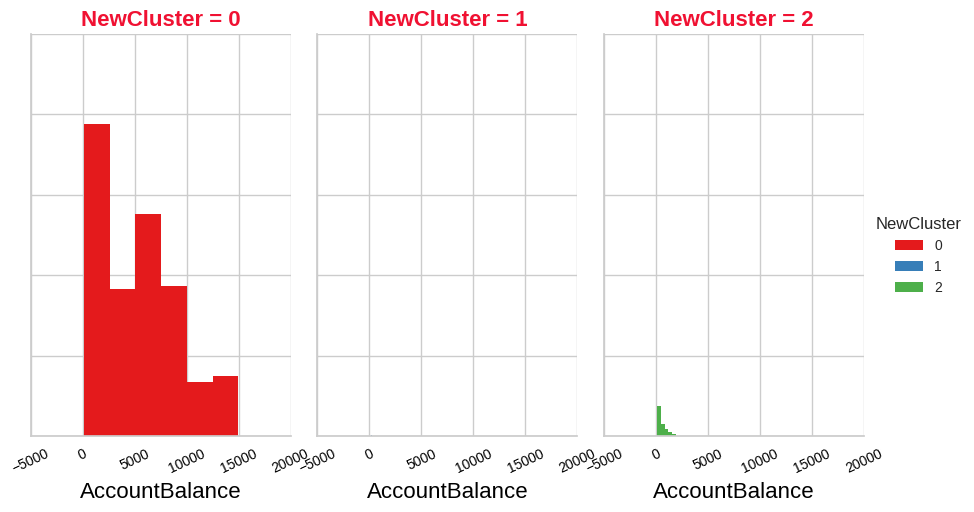

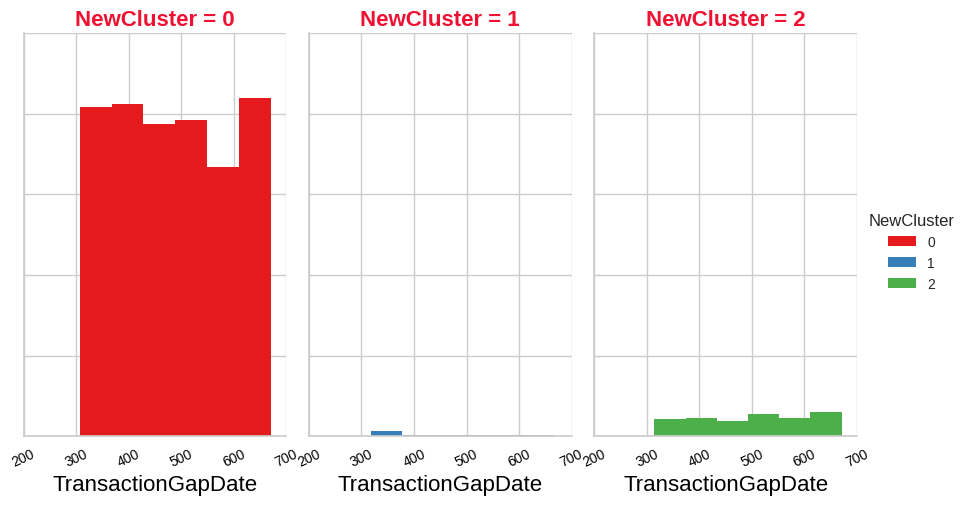

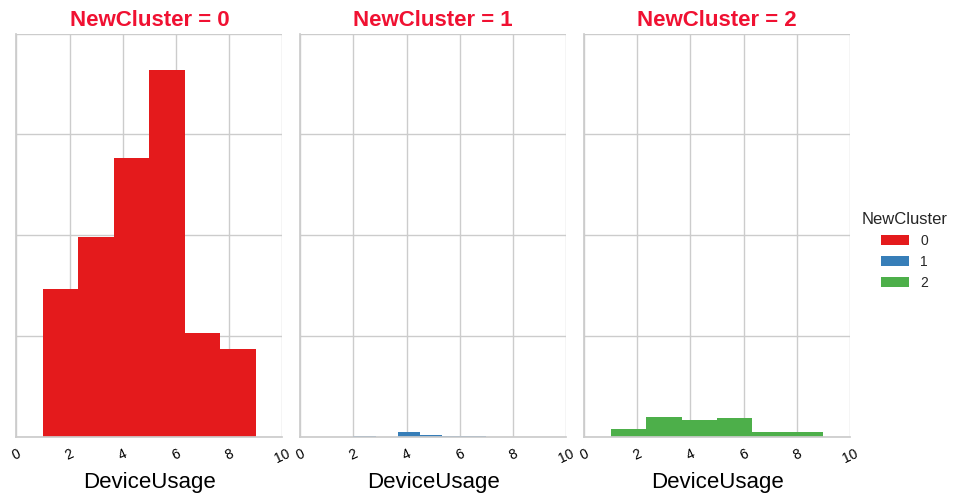

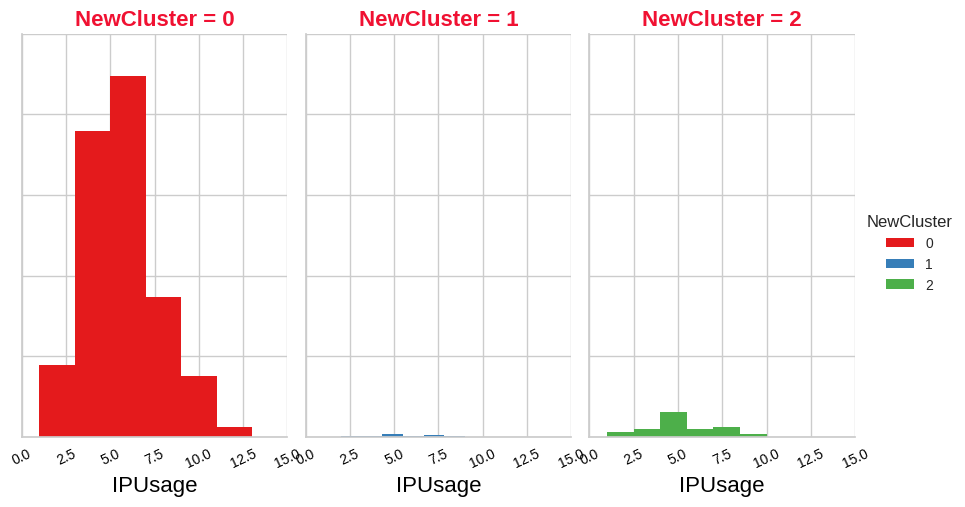

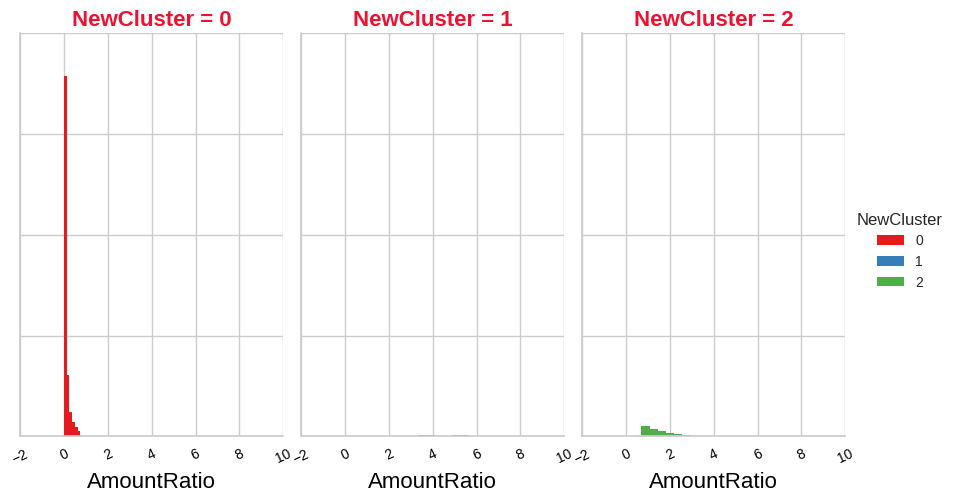

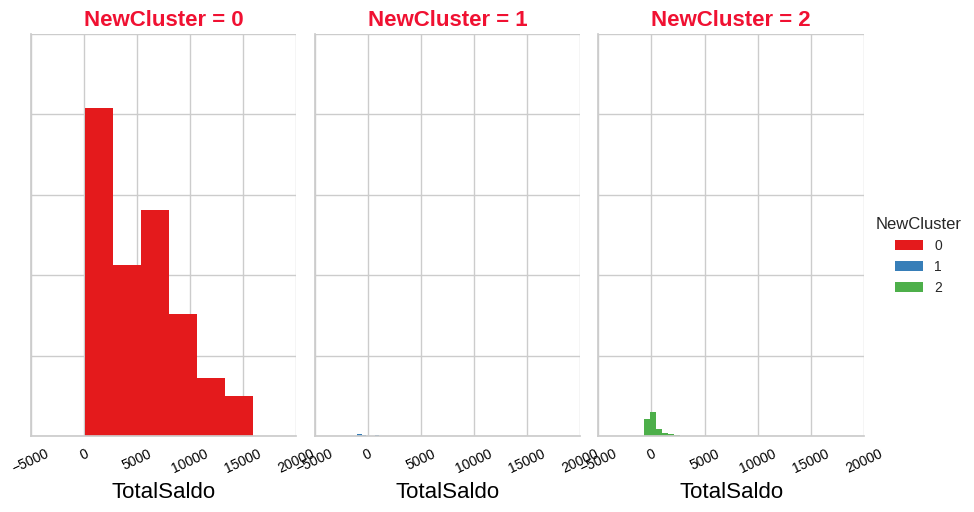

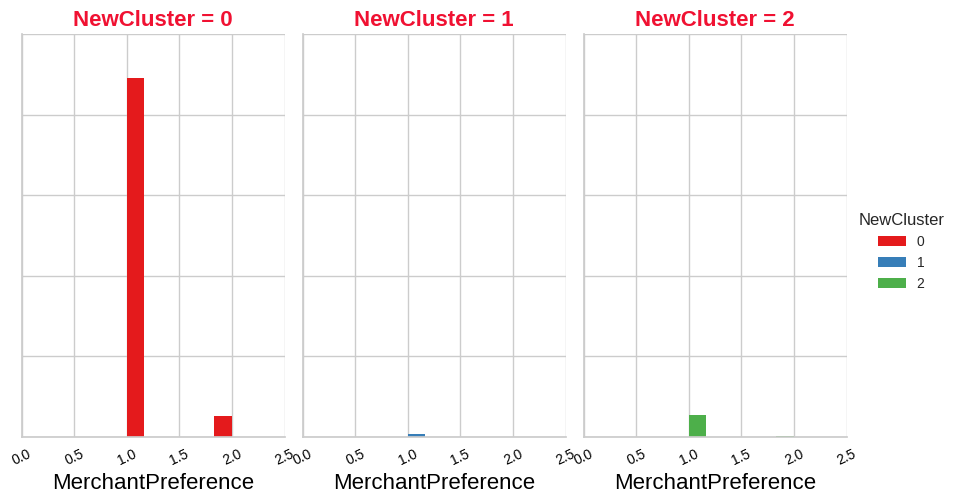

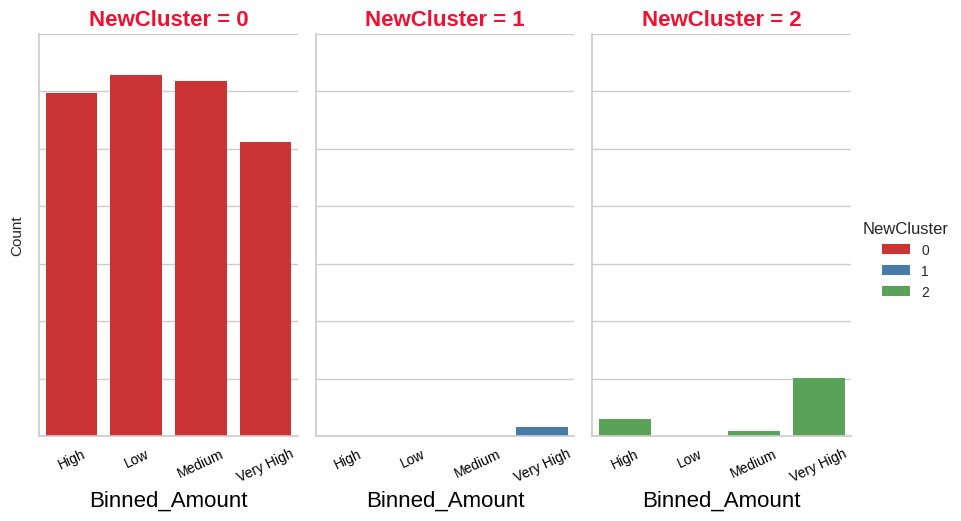

In [1089]:
for col in features:
    if col == "Cluster":
        # Skip if col is the cluster column
        continue

    diag = sns.FacetGrid(df, col="NewCluster", hue="NewCluster", palette="Set1")

    # Jika kolom numeric, buat histogram
    if df[col].dtype in [np.int64, np.float64]:
        diag.map(plt.hist, col, bins=6, ec="k")
    else:
        # Jika kolom kategorikal, buat countplot
        unique_order = sorted(df[col].dropna().unique())
        diag.map(sns.countplot, col, order=unique_order)
        diag.set_axis_labels(col, "Count")

    diag.set_xticklabels(rotation=25, color='black')
    diag.set_yticklabels(color='black')
    diag.set_xlabels(size=16, color='black')
    diag.set_titles(size=16, color='#f01132', fontweight="bold")
    diag.fig.set_figheight(6)
    diag.add_legend()

    plt.show()

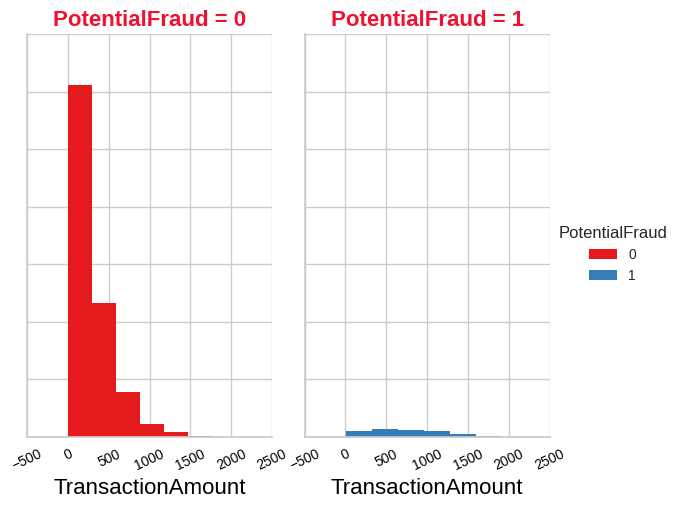

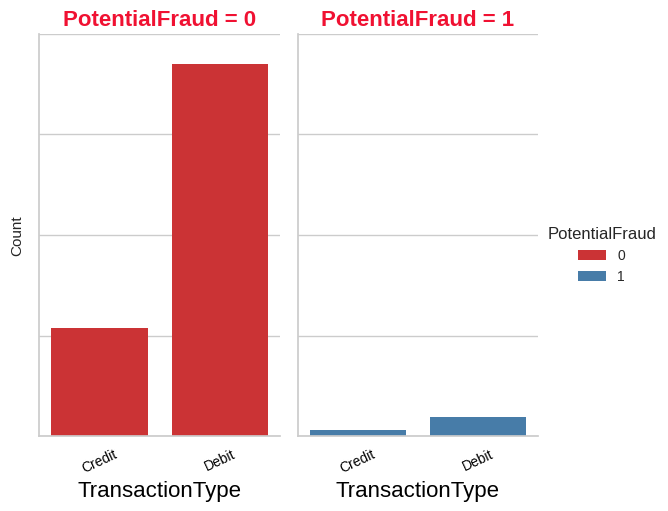

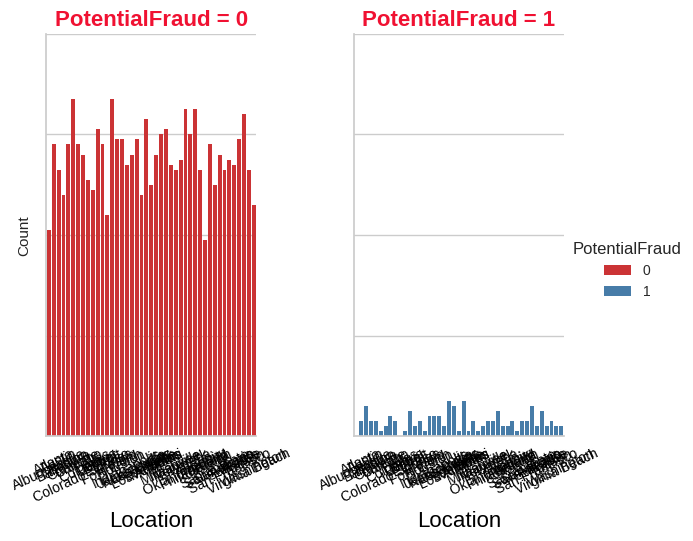

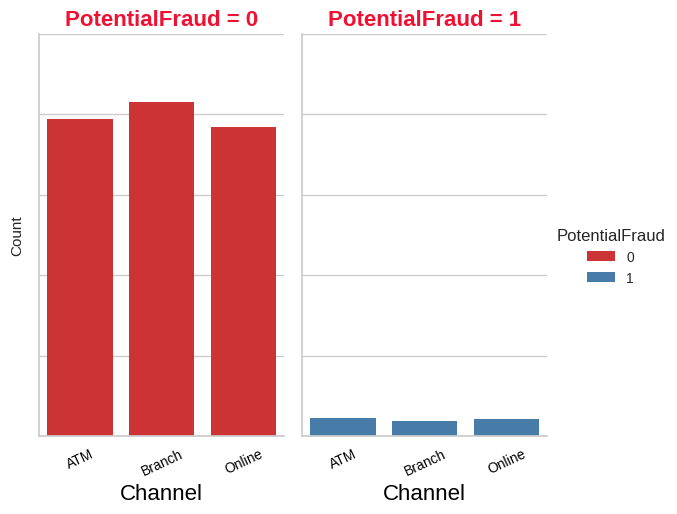

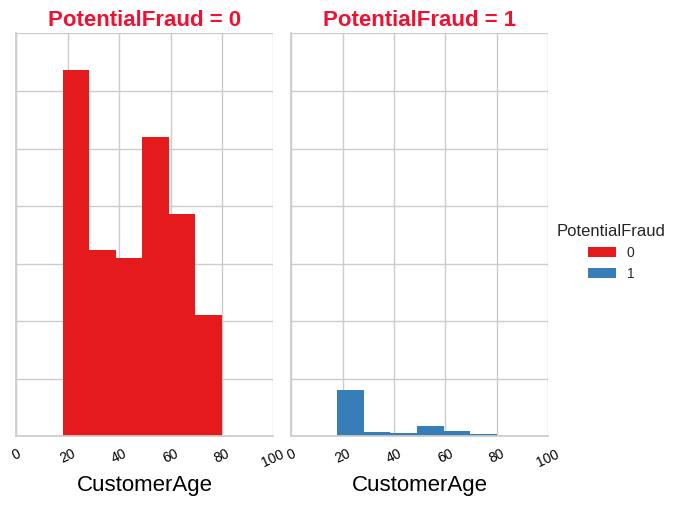

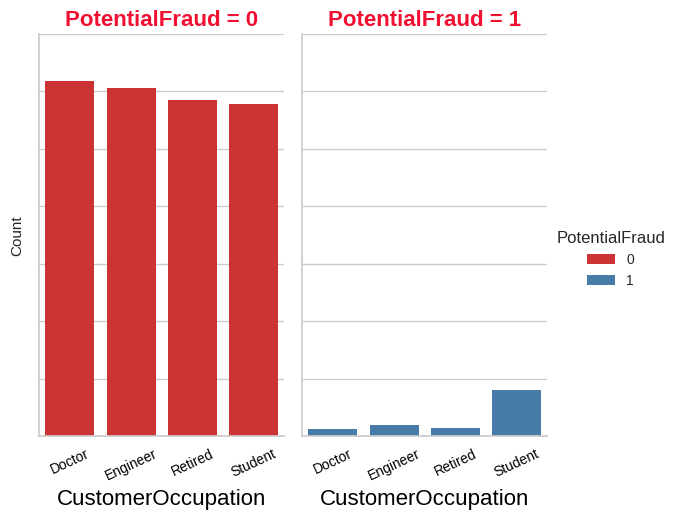

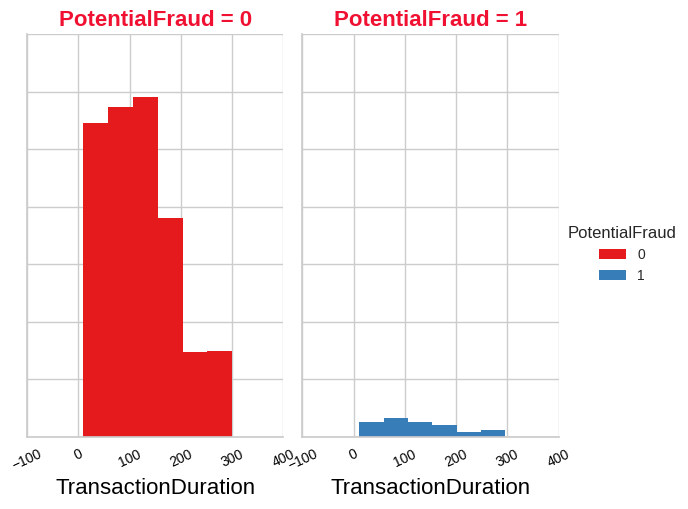

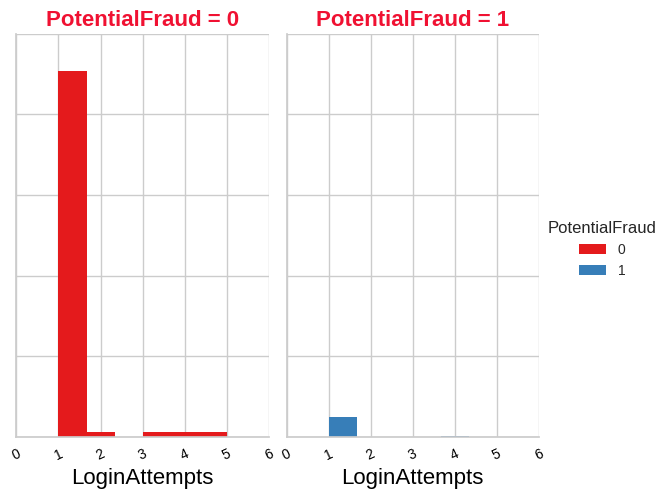

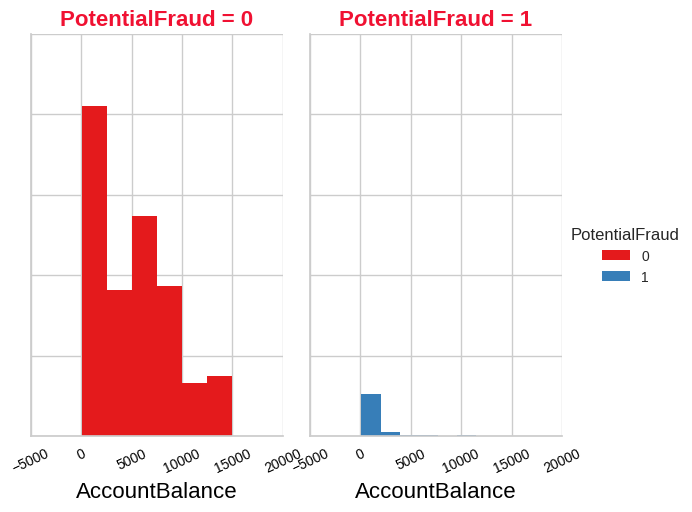

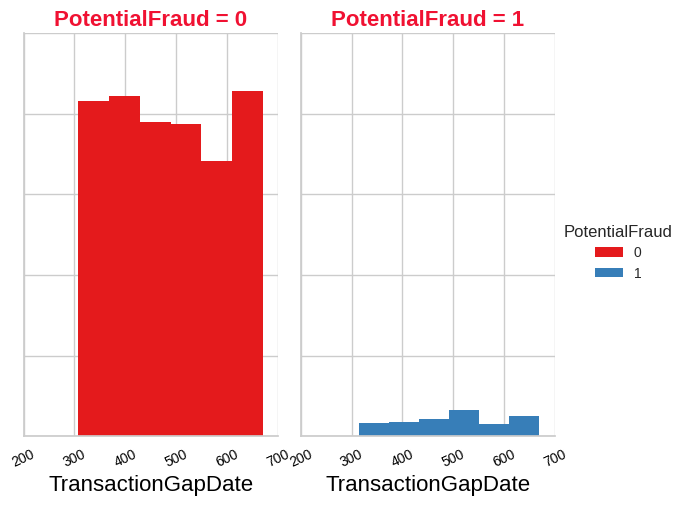

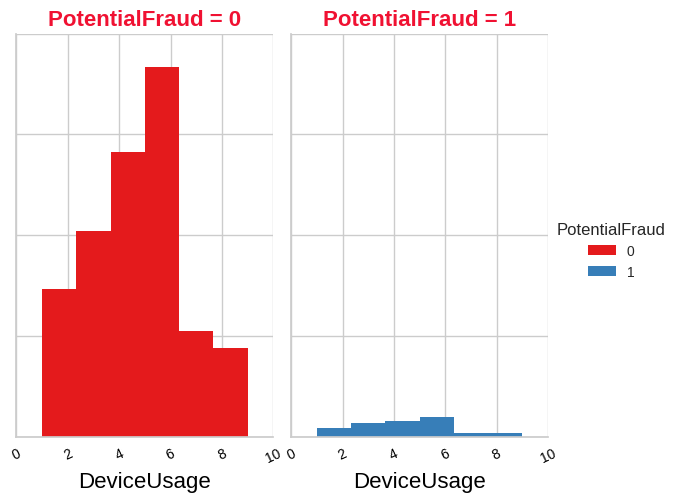

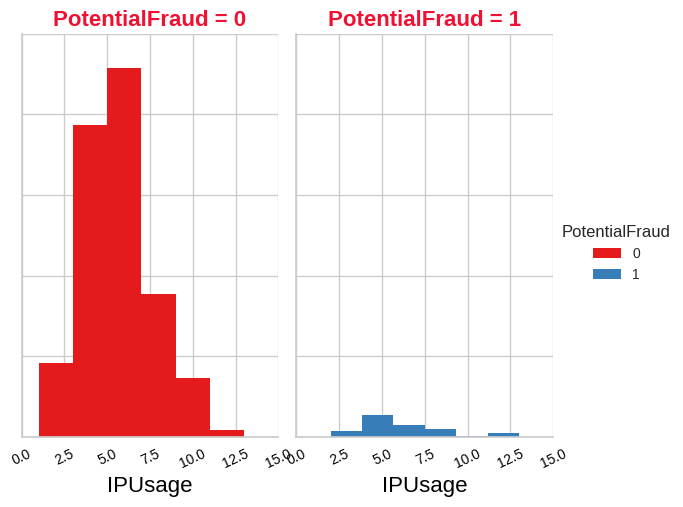

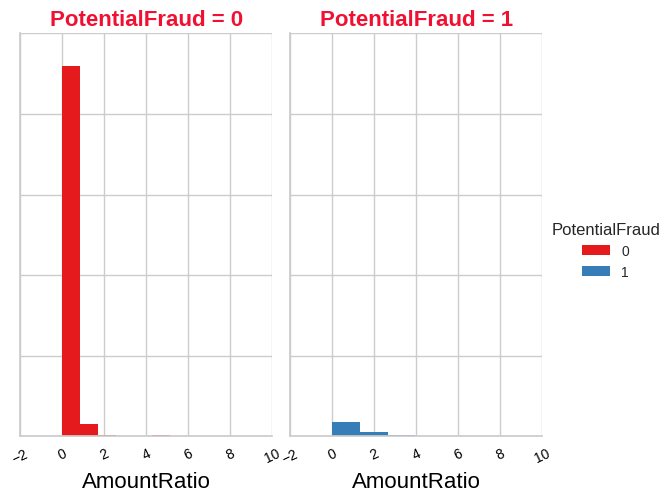

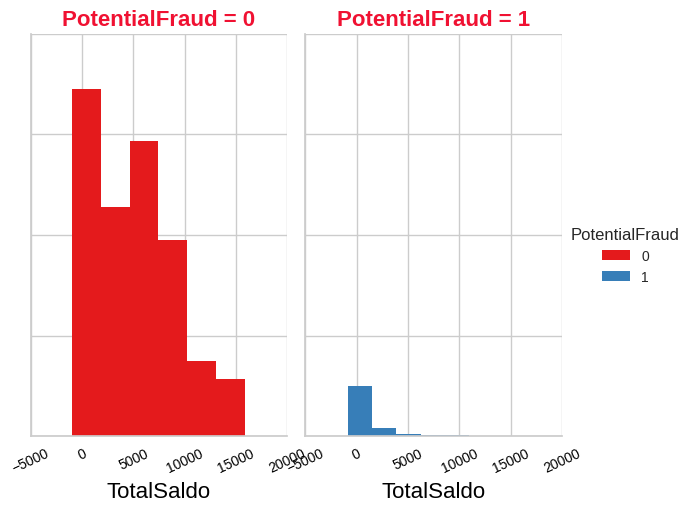

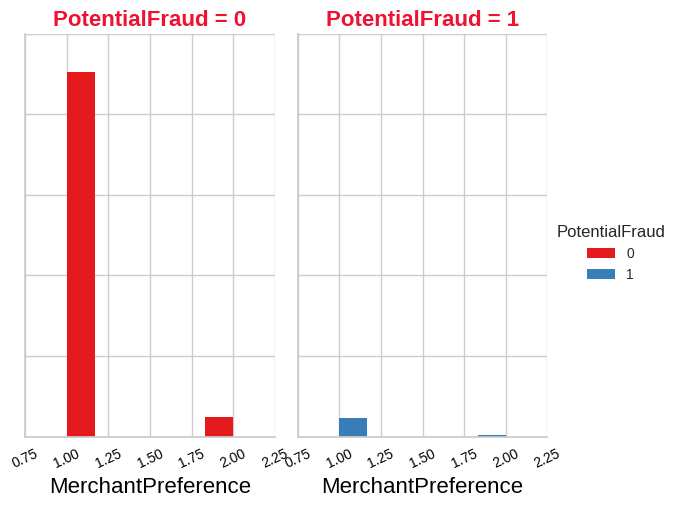

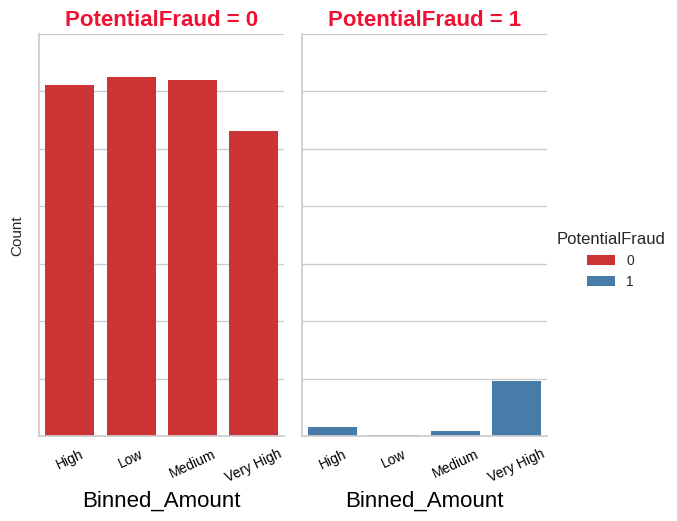

In [1090]:
for col in features:
    if col == "Cluster":
        # Skip if col is the cluster column
        continue

    diag = sns.FacetGrid(df, col="PotentialFraud", hue="PotentialFraud", palette="Set1")

    # Jika kolom numeric, buat histogram
    if df[col].dtype in [np.int64, np.float64]:
        diag.map(plt.hist, col, bins=6, ec="k")
    else:
        # Jika kolom kategorikal, buat countplot
        unique_order = sorted(df[col].dropna().unique())
        diag.map(sns.countplot, col, order=unique_order)
        diag.set_axis_labels(col, "Count")

    diag.set_xticklabels(rotation=25, color='black')
    diag.set_yticklabels(color='black')
    diag.set_xlabels(size=16, color='black')
    diag.set_titles(size=16, color='#f01132', fontweight="bold")
    diag.fig.set_figheight(6)
    diag.add_legend()

    plt.show()

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [1091]:
# Mendapatkan jumlah cluster
k = 3

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_transaction_amount = cluster_data.loc[:, 'TransactionAmount'].mean()  # Rata-rata Transaction Amount
        mean_transaction_duration = cluster_data.loc[:, 'TransactionDuration'].mean()  # Rata-rata Transaction Duration
        mean_amount_ratio = cluster_data.loc[:, 'AmountRatio'].mean()  # Rata-rata Amount Ratio
        mean_ip_usage = cluster_data.loc[:, 'IPUsage'].mean()  # Rata-rata IP Usage

        # Menampilkan hasil

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Transaction Amount: {mean_transaction_amount:.2f}")
        print(f"Rata-rata Transaction Duration: {mean_transaction_duration:.2f}")
        print(f"Rata-rata Amount Ratio: {mean_amount_ratio:.2f}")
        print(f"Rata-rata IP Usage: {mean_ip_usage:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(df, df['NewCluster'], k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Transaction Amount: 269.57
Rata-rata Transaction Duration: 119.42
Rata-rata Amount Ratio: 0.10
Rata-rata IP Usage: 5.17

Cluster 2:
Rata-rata Transaction Amount: 831.07
Rata-rata Transaction Duration: 113.69
Rata-rata Amount Ratio: 4.74
Rata-rata IP Usage: 5.56

Cluster 3:
Rata-rata Transaction Amount: 702.04
Rata-rata Transaction Duration: 124.03
Rata-rata Amount Ratio: 1.38
Rata-rata IP Usage: 4.96


Tulis hasil interpretasinya di sini.
1. Cluster 1: Kemungkinan Fraud Rendah
  - Rata-rata Transaction Amount: 269.57
  - Rata-rata Transaction Duration: 119.42
  - Rata-rata Amount Ratio: 0.10
  - Rata-rata IP Usage: 5.17
  - **Analisis:** Cluster ini menunjukkan kelompok transaksi dengan nilai relatif kecil dibandingkan cluster lainnya. Amount Ratio yang sangat rendah mengindikasikan bahwa transaksi ini hanya mengambil sebagian kecil dari saldo akun, sehingga kemungkinan besar merupakan transaksi normal. IP Usage yang moderat juga menunjukkan bahwa transaksi dilakukan dari IP yang relatif tetap, tanpa banyak perubahan. Transaksi dalam cluster ini bisa dianggap aman, tetapi tetap perlu dipantau untuk mendeteksi adanya pola transaksi yang tidak biasa, seperti frekuensi tinggi dalam waktu singkat.

2. Cluster 2: Kemungkinan Fraud Tinggi
  - Rata-rata Transaction Amount: 831.07
  - Rata-rata Transaction Duration: 113.69
  - Rata-rata Amount Ratio: 4.74
  - Rata-rata IP Usage: 5.56
  - **Analisis:** Cluster ini memiliki rata-rata transaksi dengan nilai yang cukup besar serta Amount Ratio yang sangat tinggi, menunjukkan bahwa transaksi ini mengambil porsi signifikan dari saldo akun. IP Usage yang sedikit lebih tinggi dari cluster lain dapat mengindikasikan adanya pergerakan transaksi dari berbagai IP, yang bisa menjadi tanda aktivitas mencurigakan atau penggunaan akun oleh pihak yang tidak sah. Transaksi dalam cluster ini harus mendapat perhatian lebih. Perlu dilakukan verifikasi tambahan, seperti konfirmasi dari pengguna atau analisis riwayat transaksi sebelumnya untuk memastikan apakah pola ini sesuai dengan kebiasaan normal pengguna.

3. Cluster 3: Kemungkinan Fraud Sedang
  - Rata-rata Transaction Amount: 702.04
  - Rata-rata Transaction Duration: 124.03
  - Rata-rata Amount Ratio: 1.38
  - Rata-rata IP Usage: 4.96
  - **Analisis:** Cluster ini berisi transaksi dengan nominal cukup besar, namun Amount Ratio tidak setinggi Cluster 2, sehingga masih dalam batas wajar. Transaction Duration yang lebih lama dibanding cluster lainnya bisa mengindikasikan adanya proses tambahan dalam transaksi, seperti konfirmasi manual atau penundaan dari sistem keamanan. IP Usage yang lebih rendah juga menunjukkan bahwa transaksi dilakukan dari IP yang lebih stabil. Perlu dilakukan pemantauan lebih lanjut terhadap transaksi dalam cluster ini, terutama untuk mendeteksi pola transaksi yang berubah secara tiba-tiba. Jika ada lonjakan jumlah transaksi atau perubahan perilaku pengguna, perlu dilakukan investigasi lebih lanjut.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1092]:
X_scaled['Cluster'] = df['NewCluster']
X_scaled.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionGapDate,DeviceUsage,IPUsage,AmountRatio,TotalSaldo,MerchantPreference,Binned_Amount,Cluster
0,-0.592378,0.0,0.75,-0.5,0.78125,-0.5,-0.321429,0.0,0.061009,0.467742,0.666667,-1.0,-0.368297,0.083071,0.0,-0.333333,0
1,0.496329,0.0,-0.30,-0.5,0.71875,-0.5,0.290816,0.0,1.461410,0.053763,0.333333,-0.5,-0.184103,1.417042,0.0,-1.000000,0
2,-0.255079,0.0,0.10,0.5,-0.81250,0.5,-0.576531,0.0,-0.585179,-0.016129,0.333333,1.0,0.453954,-0.577439,0.0,0.333333,0
3,-0.080086,0.0,0.60,0.5,-0.59375,0.5,-0.892857,0.0,0.620873,0.338710,0.666667,1.5,-0.227657,0.612251,0.0,0.333333,0
4,-0.594302,-1.0,-1.00,0.5,-0.59375,0.5,0.872449,0.0,0.436296,-0.543011,-0.333333,-0.5,-0.375382,0.460618,0.0,-0.333333,0


In [1093]:
# save to csv
X_scaled.to_csv('bank transaction segmentation.csv', index=False)